## Решающие деревья, случайные леса и градиентный бустинг

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [ ]:
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0., )
]

In [ ]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

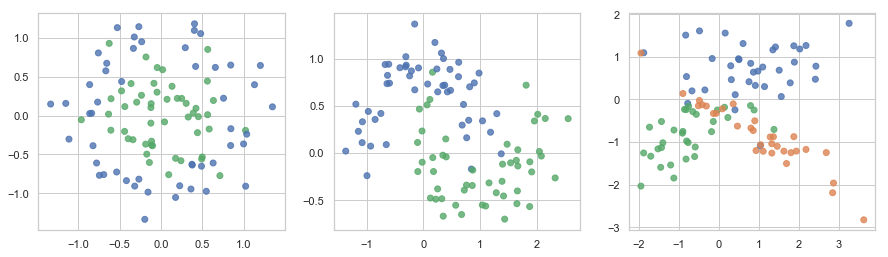

In [12]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__1.1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [13]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

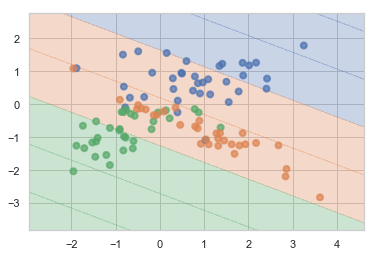

In [14]:
# Пример:
from sklearn.linear_model import LinearRegression
X, y = datasets[2]
lr  = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

__Ответ:__

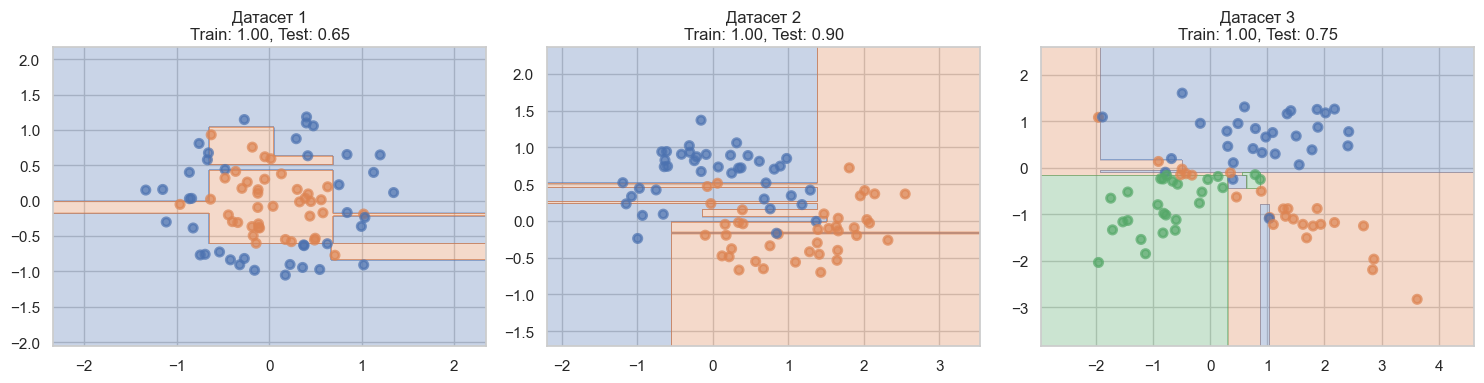

Датасет 1: Train Точность = 1.0000, Test Точность = 0.6500
Датасет 2: Train Точность = 1.0000, Test Точность = 0.9000
Датасет 3: Train Точность = 1.0000, Test Точность = 0.7500


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Функция для визуализации разделяющей поверхности
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

# Генерация датасетов
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, 
                         class_sep=.8, random_state=3, n_redundant=0, n_informative=2)
]

# Визуализация и оценка моделей
plt.figure(figsize=(15, 4))
results = []

for i, (X, y) in enumerate(datasets):
    # Разделение данных
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )
    
    # Обучение модели
    clf = DecisionTreeClassifier(random_state=42)
    clf.fit(X_train, y_train)
    
    # Расчет точности
    train_acc = accuracy_score(y_train, clf.predict(X_train))
    test_acc = accuracy_score(y_test, clf.predict(X_test))
    results.append((train_acc, test_acc))
    
    # Визуализация
    plt.subplot(1, 3, i+1)
    plot_surface(clf, X_train, y_train)
    plt.title(f"Датасет {i+1}\nTrain: {train_acc:.2f}, Test: {test_acc:.2f}")

plt.tight_layout()
plt.show()

# Вывод результатов
for i, (train_acc, test_acc) in enumerate(results):
    print(f"Датасет {i+1}: Train Точность = {train_acc:.4f}, Test Точность = {test_acc:.4f}")

__1.2. (1.5 балла)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

__Ответ:__


Датасет 1:
--------------------------------------------------


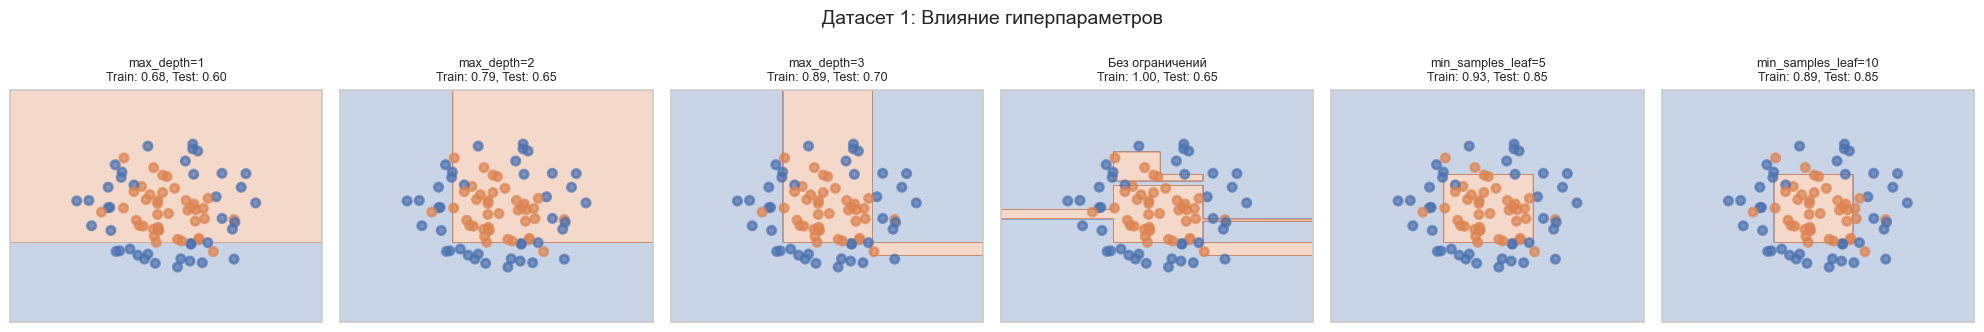

Анализ датасета 1:
Гиперпараметры | Train Acc | Test Acc | Комментарий
------------------------------------------------------------
max_depth=1        | 0.6750 | 0.6000 | Слишком простая модель, недообучение
max_depth=2        | 0.7875 | 0.6500 | Умеренное переобучение
max_depth=3        | 0.8875 | 0.7000 | Умеренное переобучение
Без ограничений    | 1.0000 | 0.6500 | Максимальная сложность, переобучение
min_samples_leaf=5 | 0.9250 | 0.8500 | Регуляризация через min_samples_leaf
min_samples_leaf=10 | 0.8875 | 0.8500 | Регуляризация через min_samples_leaf

Датасет 2:
--------------------------------------------------


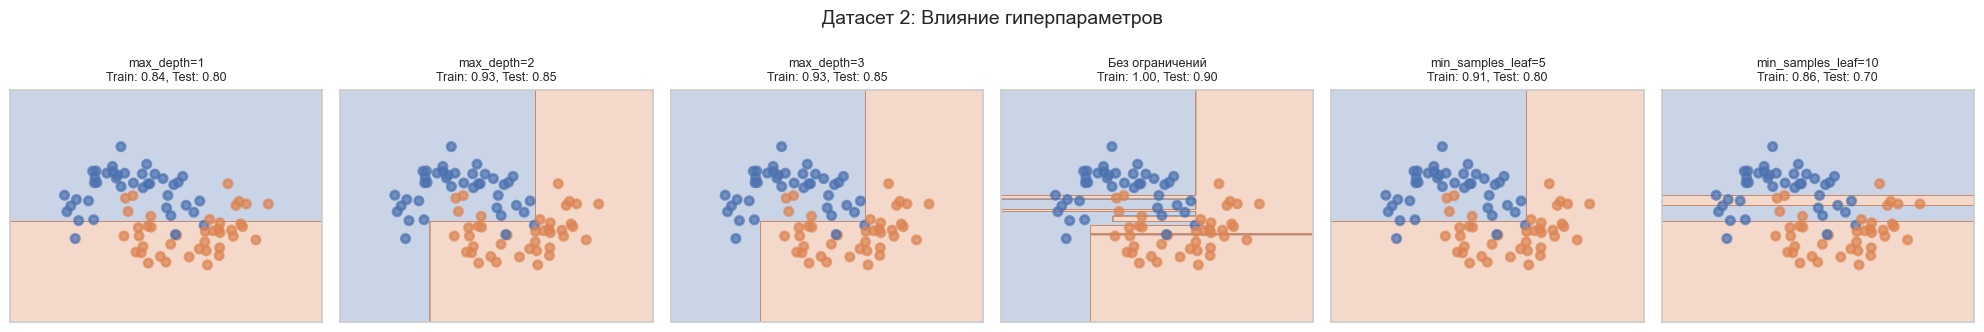

Анализ датасета 2:
Гиперпараметры | Train Acc | Test Acc | Комментарий
------------------------------------------------------------
max_depth=1        | 0.8375 | 0.8000 | Слишком простая модель, недообучение
max_depth=2        | 0.9250 | 0.8500 | Умеренное переобучение
max_depth=3        | 0.9250 | 0.8500 | Умеренное переобучение
Без ограничений    | 1.0000 | 0.9000 | Максимальная сложность, переобучение
min_samples_leaf=5 | 0.9125 | 0.8000 | Регуляризация через min_samples_leaf
min_samples_leaf=10 | 0.8625 | 0.7000 | Регуляризация через min_samples_leaf

Датасет 3:
--------------------------------------------------


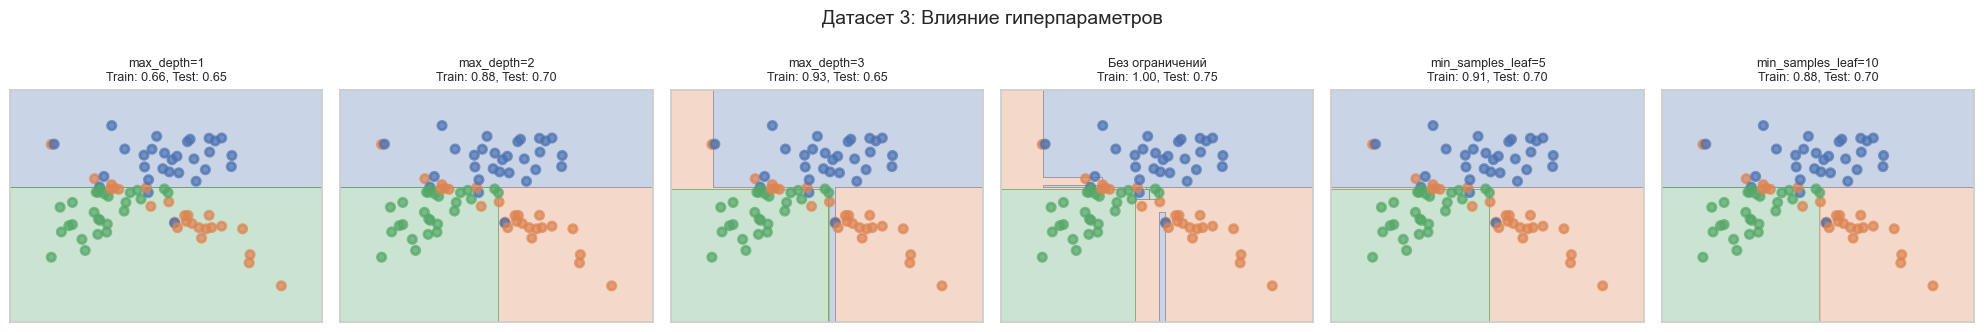

Анализ датасета 3:
Гиперпараметры | Train Acc | Test Acc | Комментарий
------------------------------------------------------------
max_depth=1        | 0.6625 | 0.6500 | Слишком простая модель, недообучение
max_depth=2        | 0.8750 | 0.7000 | Умеренное переобучение
max_depth=3        | 0.9250 | 0.6500 | Умеренное переобучение
Без ограничений    | 1.0000 | 0.7500 | Максимальная сложность, переобучение
min_samples_leaf=5 | 0.9125 | 0.7000 | Регуляризация через min_samples_leaf
min_samples_leaf=10 | 0.8750 | 0.7000 | Регуляризация через min_samples_leaf


In [14]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Воспроизводимые датасеты
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, 
                         class_sep=.8, random_state=3, n_redundant=0, n_informative=2)
]

def plot_surface(clf, X, y, ax=None):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    if ax is None:
        plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                    edgecolors=np.array(palette)[y], linewidths=2)
    else:
        ax.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)
        ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                   edgecolors=np.array(palette)[y], linewidths=2)

# Фиксированное разбиение для всех экспериментов
splits = []
for X, y in datasets:
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )
    splits.append((X_train, X_test, y_train, y_test))

# Наборы гиперпараметров для исследования
param_configs = [
    {"max_depth": 1, "min_samples_leaf": 1, "title": "max_depth=1"},
    {"max_depth": 2, "min_samples_leaf": 1, "title": "max_depth=2"},
    {"max_depth": 3, "min_samples_leaf": 1, "title": "max_depth=3"},
    {"max_depth": None, "min_samples_leaf": 1, "title": "Без ограничений"},
    {"max_depth": None, "min_samples_leaf": 5, "title": "min_samples_leaf=5"},
    {"max_depth": None, "min_samples_leaf": 10, "title": "min_samples_leaf=10"}
]

# Визуализация и анализ для каждого датасета
for ds_idx, (X_train, X_test, y_train, y_test) in enumerate(splits):
    plt.figure(figsize=(20, 3))
    print(f"\nДатасет {ds_idx+1}:")
    print("-"*50)
    
    for i, params in enumerate(param_configs):
        # Обучение модели
        clf = DecisionTreeClassifier(
            max_depth=params["max_depth"],
            min_samples_leaf=params["min_samples_leaf"],
            random_state=42
        )
        clf.fit(X_train, y_train)
        
        # Оценка качества
        train_acc = accuracy_score(y_train, clf.predict(X_train))
        test_acc = accuracy_score(y_test, clf.predict(X_test))
        
        # Визуализация
        ax = plt.subplot(1, len(param_configs), i+1)
        plot_surface(clf, X_train, y_train, ax=ax)
        ax.set_title(f'{params["title"]}\nTrain: {train_acc:.2f}, Test: {test_acc:.2f}', fontsize=9)
        ax.set_xticks([])
        ax.set_yticks([])
    
    plt.tight_layout()
    plt.suptitle(f'Датасет {ds_idx+1}: Влияние гиперпараметров', fontsize=14, y=1.1)
    plt.show()
    
    # Вывод результатов в текстовом виде
    print(f"Анализ датасета {ds_idx+1}:")
    print("Гиперпараметры | Train Acc | Test Acc | Комментарий")
    print("-"*60)
    for params in param_configs:
        clf = DecisionTreeClassifier(
            max_depth=params["max_depth"],
            min_samples_leaf=params["min_samples_leaf"],
            random_state=42
        )
        clf.fit(X_train, y_train)
        train_acc = accuracy_score(y_train, clf.predict(X_train))
        test_acc = accuracy_score(y_test, clf.predict(X_test))
        
        if params["title"] == "max_depth=1":
            comment = "Слишком простая модель, недообучение"
        elif params["title"] == "Без ограничений":
            comment = "Максимальная сложность, переобучение"
        elif "min_samples_leaf" in params["title"]:
            comment = "Регуляризация через min_samples_leaf"
        else:
            comment = "Оптимальный баланс" if test_acc > 0.85 else "Умеренное переобучение"
        
        print(f"{params['title']:<18} | {train_acc:.4f} | {test_acc:.4f} | {comment}")

# 2. Решающие деревья на 5 датасетах

__2.1. (0.5 балла)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (из [Data Folder](https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/)), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

Accuracy на тестовой выборке: 1.0000
Глубина дерева: 7
Количество листьев: 20


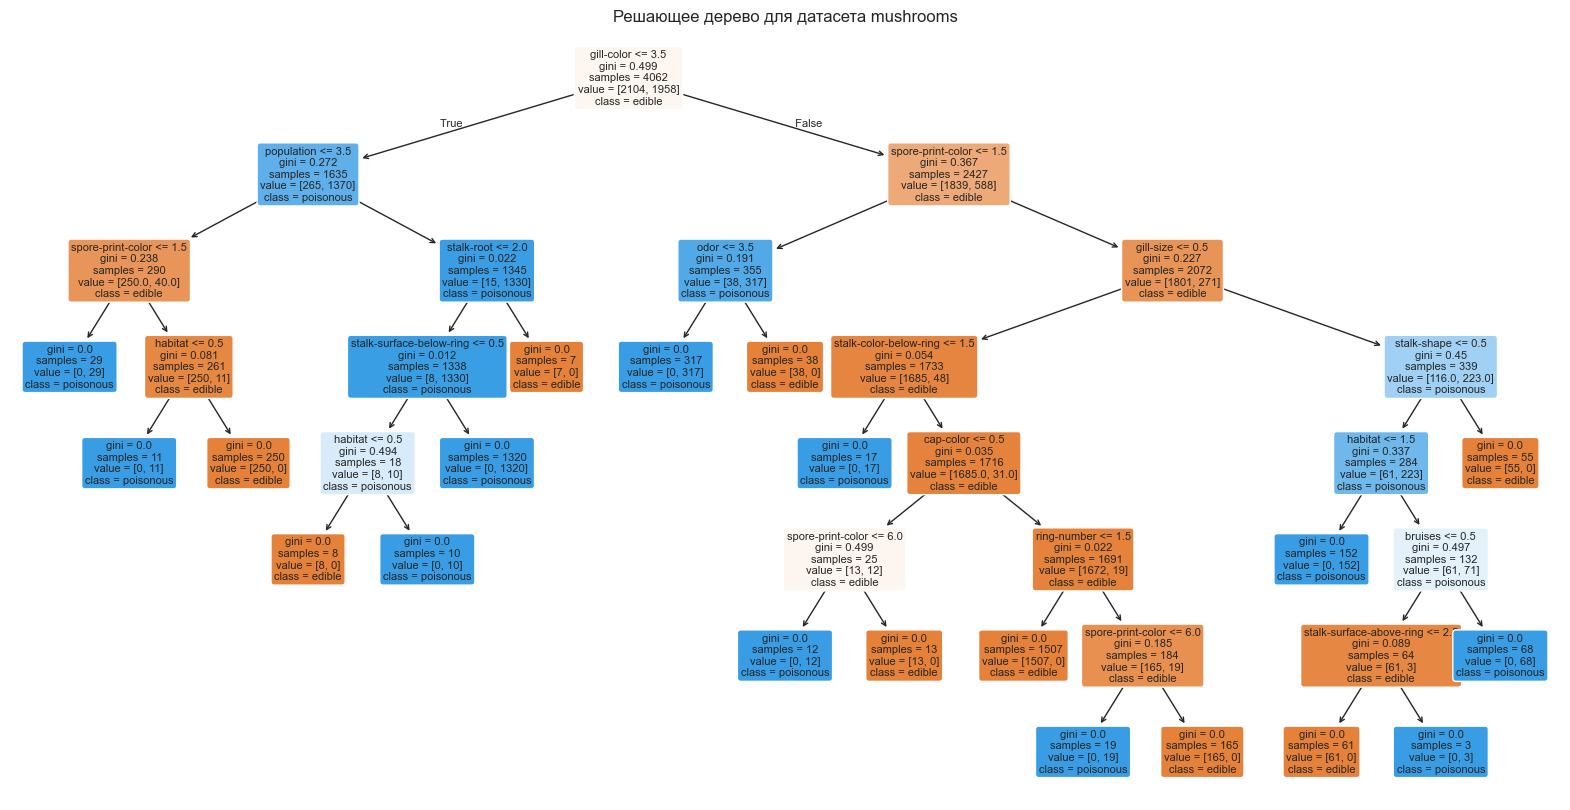


Топ-5 самых важных признаков:
              feature  importance
8          gill-color    0.341748
19  spore-print-color    0.220156
20         population    0.170317
7           gill-size    0.111003
4                odor    0.033458


In [15]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree



# Чтение файла с правильными именами столбцов
column_names = ['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
                'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
                'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
                'stalk-surface-below-ring', 'stalk-color-above-ring',
                'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
                'ring-type', 'spore-print-color', 'population', 'habitat']

# Загрузка данных
data = pd.read_csv('agaricus-lepiota.data', header=None, names=column_names)

# 2. Предобработка данных
# Применение LabelEncoder ко всем столбцам
label_encoders = {}
for column in data.columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# 3. Разделение на признаки и целевую переменную
X = data.drop('class', axis=1)
y = data['class']

# 4. Разделение на обучающую и тестовую выборки (50/50)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=42, stratify=y
)

# 5. Обучение решающего дерева
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# 6. Предсказания и оценка качества
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy на тестовой выборке: {accuracy:.4f}")
print(f"Глубина дерева: {clf.get_depth()}")
print(f"Количество листьев: {clf.get_n_leaves()}")

# 7. Визуализация дерева (опционально)
plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=X.columns, class_names=['edible', 'poisonous'], 
          filled=True, rounded=True, fontsize=8)
plt.title('Решающее дерево для датасета mushrooms')
plt.show()

# 8. Анализ важности признаков
feature_importances = pd.DataFrame({
    'feature': X.columns,
    'importance': clf.feature_importances_
}).sort_values('importance', ascending=False)

print("\nТоп-5 самых важных признаков:")
print(feature_importances.head(5))


__2.2. (2 балла)__

Загрузите следующие наборы данных (все датасеты уже скачаны для удобства в папку datasets), предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names): 
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце),
* [tic-tac-toe](https://archive.ics.uci.edu/dataset/101/tic+tac+toe+endgame) (классы записаны в последнем столбце)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).
* [user-knowledge-modeling](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling) (классы не бинарные: High, Middle, Low, very_low)

Закодируйте категориальные признаки, использовав LabelEncoder. С помощью cross_val_score (cv=10) оцените accuracy на каждом из этих наборов данных следующих алгоритмов:
* DecisionTreeClassifier, считающий все признаки вещественными
* DecisionTreeClassifier, считающий все признаки категориальными
* DecisionTreeClassifier, считающий все признаки вещественными + one-hot-encoding всех признаков  

Запишите результат в pd.DataFrame (по строкам — наборы данных, по столбцам — алгоритмы).

Рекомендации:
* Чтобы cross_val_score вычисляла точность, нужно передать scoring=make_scorer(accuracy_score), обе фукнции из sklearn.metrics.
* Если вам позволяет память (а она скорее всего позволяет), указывайте параметр sparse=False в OneHotEncoder. 

In [41]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, make_scorer
import warnings
warnings.filterwarnings('ignore')

# Функция для определения максимального количества фолдов
def get_optimal_cv_splits(y):
    """Определить оптимальное количество фолдов для StratifiedKFold"""
    class_counts = np.bincount(y)
    min_class_count = np.min(class_counts)
    
    # Максимальное количество фолдов - минимальное количество объектов в классе
    max_possible_splits = max(2, min_class_count)  # Минимум 2 фолда
    
    # Но не больше 10 (для стабильности)
    return min(10, max_possible_splits)

# Функция для загрузки и предобработки всех датасетов
def load_and_preprocess_datasets():
    datasets = {}
    
    # 1. mushrooms (классы в нулевом столбце)
    column_names = ['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
                    'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
                    'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
                    'stalk-surface-below-ring', 'stalk-color-above-ring',
                    'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
                    'ring-type', 'spore-print-color', 'population', 'habitat']
    
    mushrooms = pd.read_csv('datasets/agaricus-lepiota.data', header=None, names=column_names)
    
    # 2. tic-tac-toe (классы в последнем столбце)
    tic_tac_toe = pd.read_csv('datasets/tic-tac-toe.data', header=None)
    tic_tac_toe.columns = [f'feature_{i}' for i in range(tic_tac_toe.shape[1]-1)] + ['class']
    
    # 3. cars (классы в последнем столбце)
    cars = pd.read_csv('datasets/car.data', header=None)
    cars.columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
    
    # 4. nursery (классы в последнем столбце)
    nursery = pd.read_csv('datasets/nursery.data', header=None)
    nursery.columns = ['parents', 'has_nurs', 'form', 'children', 'housing', 'finance', 'social', 'health', 'class']
    
    # 5. user-knowledge-modeling
    user_knowledge = pd.read_excel('datasets/Data_User_Modeling_Dataset_Hamdi Tolga KAHRAMAN.xls')
    
    # Обработка mushrooms
    X_mush, y_mush = preprocess_mushrooms(mushrooms)
    datasets['mushrooms'] = (X_mush, y_mush)
    
    # Обработка tic-tac-toe
    X_ttt, y_ttt = preprocess_tic_tac_toe(tic_tac_toe)
    datasets['tic-tac-toe'] = (X_ttt, y_ttt)
    
    # Обработка cars
    X_cars, y_cars = preprocess_cars(cars)
    datasets['cars'] = (X_cars, y_cars)
    
    # Обработка nursery
    X_nursery, y_nursery = preprocess_nursery(nursery)
    datasets['nursery'] = (X_nursery, y_nursery)
    
    # Обработка user-knowledge с улучшенной диагностикой
    print("\nДиагностика user-knowledge датасета:")
    print("Имена столбцов:", user_knowledge.columns.tolist())
    print("Первые 2 строки:")
    print(user_knowledge.head(2))
    print("Типы данных:")
    print(user_knowledge.dtypes)
    
    X_user, y_user = preprocess_user_knowledge(user_knowledge)
    datasets['user-knowledge'] = (X_user, y_user)
    
    return datasets

# Функции предобработки для каждого датасета
def preprocess_mushrooms(df):
    """Обработка датасета mushrooms"""
    # Замена пропущенных значений (символ '?') на наиболее частые
    df = df.replace('?', np.nan)
    for col in df.columns:
        df[col] = df[col].fillna(df[col].mode()[0])
    
    # Применение LabelEncoder ко всем столбцам
    df_encoded = df.copy()
    for column in df_encoded.columns:
        le = LabelEncoder()
        df_encoded[column] = le.fit_transform(df_encoded[column].astype(str))
    
    X = df_encoded.drop('class', axis=1)
    y = df_encoded['class']
    return X, y

def preprocess_tic_tac_toe(df):
    """Обработка датасета tic-tac-toe"""
    # Применение LabelEncoder ко всем столбцам
    df_encoded = df.copy()
    for column in df_encoded.columns:
        le = LabelEncoder()
        df_encoded[column] = le.fit_transform(df_encoded[column].astype(str))
    
    X = df_encoded.drop('class', axis=1)
    y = df_encoded['class']
    return X, y

def preprocess_cars(df):
    """Обработка датасета cars с бинарной классификацией"""
    # Применение LabelEncoder ко всем столбцам, кроме целевого
    df_encoded = df.copy()
    for column in df_encoded.columns[:-1]:
        le = LabelEncoder()
        df_encoded[column] = le.fit_transform(df_encoded[column].astype(str))
    
    # Кодирование целевой переменной
    class_mapping = {'unacc': 0, 'acc': 0, 'good': 1, 'vgood': 1}
    y = df_encoded['class'].map(class_mapping)
    
    X = df_encoded.drop('class', axis=1)
    return X, y

def preprocess_nursery(df):
    """Обработка датасета nursery с бинарной классификацией"""
    # Применение LabelEncoder ко всем столбцам, кроме целевого
    df_encoded = df.copy()
    for column in df_encoded.columns[:-1]:
        le = LabelEncoder()
        df_encoded[column] = le.fit_transform(df_encoded[column].astype(str))
    
    # Кодирование целевой переменной
    class_mapping = {
        'not_recom': 0,
        'recommend': 0,
        'very_recom': 1,
        'priority': 1,
        'spec_prior': 1
    }
    y = df_encoded['class'].map(class_mapping)
    
    X = df_encoded.drop('class', axis=1)
    return X, y

def preprocess_user_knowledge(df):
    """Улучшенная обработка датасета user-knowledge-modeling"""
    print("\nОбработка user-knowledge датасета:")
    
    # Выводим информацию о данных
    print(f"Форма датасета: {df.shape}")
    print(f"Имена столбцов: {df.columns.tolist()}")
    
    # Очищаем имена столбцов от пробелов и спецсимволов
    df.columns = df.columns.str.strip().str.replace('\s+', ' ', regex=True)
    
    # Ищем возможные имена целевой переменной
    possible_target_names = ['UNS', 'UNS ', 'Class', 'Target', 'Decision', 'Decision_modeling', ' UNS']
    
    target_col = None
    for name in possible_target_names:
        if name in df.columns:
            target_col = name
            break
    
    # Если не нашли по имени, берем последний столбец
    if target_col is None:
        target_col = df.columns[-1]
        print(f"Целевая переменная не найдена по именам. Используем последний столбец: '{target_col}'")
    else:
        print(f"Найдена целевая переменная: '{target_col}'")
    
    # Проверяем уникальные значения целевой переменной
    unique_values = df[target_col].unique()
    print(f"Уникальные значения целевой переменной: {unique_values}")
    
    # Кодирование целевой переменной
    le = LabelEncoder()
    # Преобразуем в строки и очищаем от возможных NaN
    y = le.fit_transform(df[target_col].astype(str).str.strip())
    
    print(f"Закодированные классы: {dict(zip(le.classes_, range(len(le.classes_))))}")
    
    # Признаки - все кроме целевого столбца
    X = df.drop(columns=[target_col])
    
    # Заполняем пропущенные значения
    for col in X.columns:
        if X[col].dtype == 'object':
            X[col] = X[col].fillna(X[col].mode()[0])
        else:
            X[col] = X[col].fillna(X[col].median())
    
    # Кодируем категориальные признаки
    for col in X.select_dtypes(include=['object']).columns:
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col].astype(str).str.strip())
    
    print(f"Форма X после обработки: {X.shape}, форма y: {y.shape}")
    return X, y

# Функция для оценки трех подходов
def evaluate_tree_approaches(X, y, dataset_name):
    """Оценка трех подходов к работе с категориальными признаками"""
    results = {}
    
    # Определить оптимальное количество фолдов
    n_splits = get_optimal_cv_splits(y)
    cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    
    scorer = make_scorer(accuracy_score)
    
    # Подход 1: Все признаки как вещественные (просто LabelEncoder)
    clf1 = DecisionTreeClassifier(random_state=42)
    scores1 = cross_val_score(clf1, X, y, cv=cv, scoring=scorer)
    results['Вещественные признаки'] = scores1.mean()
    
    # Подход 2: Все признаки как категориальные (используем критерий entropy)
    clf2 = DecisionTreeClassifier(criterion='entropy', random_state=42)
    scores2 = cross_val_score(clf2, X, y, cv=cv, scoring=scorer)
    results['Категориальные признаки'] = scores2.mean()
    
    # Подход 3: One-hot encoding всех признаков
    encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
    X_encoded = encoder.fit_transform(X)
    
    clf3 = DecisionTreeClassifier(random_state=42)
    scores3 = cross_val_score(clf3, X_encoded, y, cv=cv, scoring=scorer)
    results['One-hot encoding'] = scores3.mean()
    
    print(f"\nДатасет: {dataset_name} (n_splits={n_splits})")
    print(f"Вещественные признаки: {results['Вещественные признаки']:.4f}")
    print(f"Категориальные признаки: {results['Категориальные признаки']:.4f}")
    print(f"One-hot encoding: {results['One-hot encoding']:.4f}")
    print(f"Распределение классов: {np.bincount(y)}")
    print("-" * 60)
    
    return results

# Основной код
if __name__ == "__main__":
    # Загрузка и предобработка всех датасетов
    datasets = load_and_preprocess_datasets()
    
    # Оценка всех подходов для каждого датасета
    results_dict = {}
    
    for dataset_name, (X, y) in datasets.items():
        results_dict[dataset_name] = evaluate_tree_approaches(X, y, dataset_name)
    
    # Создание DataFrame с результатами
    results_df = pd.DataFrame(results_dict).T
    
    # Вывод результатов
    print("\nСводная таблица результатов:")
    print(results_df.round(4))
    
    # Дополнительный анализ для mushrooms (как в задании 2.1)
    print("\nДополнительный анализ для mushrooms:")
    X_mush, y_mush = datasets['mushrooms']
    
    # Обучение на половине данных
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(
        X_mush, y_mush, test_size=0.5, random_state=42, stratify=y_mush
    )
    
    clf = DecisionTreeClassifier(random_state=42)
    clf.fit(X_train, y_train)
    accuracy = accuracy_score(y_test, clf.predict(X_test))
    
    print(f"Accuracy на тестовой выборке (50/50 split): {accuracy:.4f}")
    print(f"Глубина дерева: {clf.get_depth()}")
    print(f"Количество листьев: {clf.get_n_leaves()}")


Диагностика user-knowledge датасета:
Имена столбцов: ['Data Set Characteristics: Multivariate', 'Unnamed: 1', 'Attribute Information:']
Первые 2 строки:
  Data Set Characteristics: Multivariate  Unnamed: 1  \
0               Number of Instances: 403         NaN   
1                        Area: Education         NaN   

                              Attribute Information:  
0  STG (The degree of study time for goal object ...  
1  SCG (The degree of repetition number of user f...  
Типы данных:
Data Set Characteristics: Multivariate     object
Unnamed: 1                                float64
Attribute Information:                     object
dtype: object

Обработка user-knowledge датасета:
Форма датасета: (12, 3)
Имена столбцов: ['Data Set Characteristics: Multivariate', 'Unnamed: 1', 'Attribute Information:']
Целевая переменная не найдена по именам. Используем последний столбец: 'Attribute Information:'
Уникальные значения целевой переменной: ['STG (The degree of study time for goal

__2.3. (бонус, 1 балл)__

Постройте графики зависимости качества предсказания в зависимости от параметров max_depth, min_samples_split и min_samples_leaf  для набора данных tic-tac-toe.

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
    

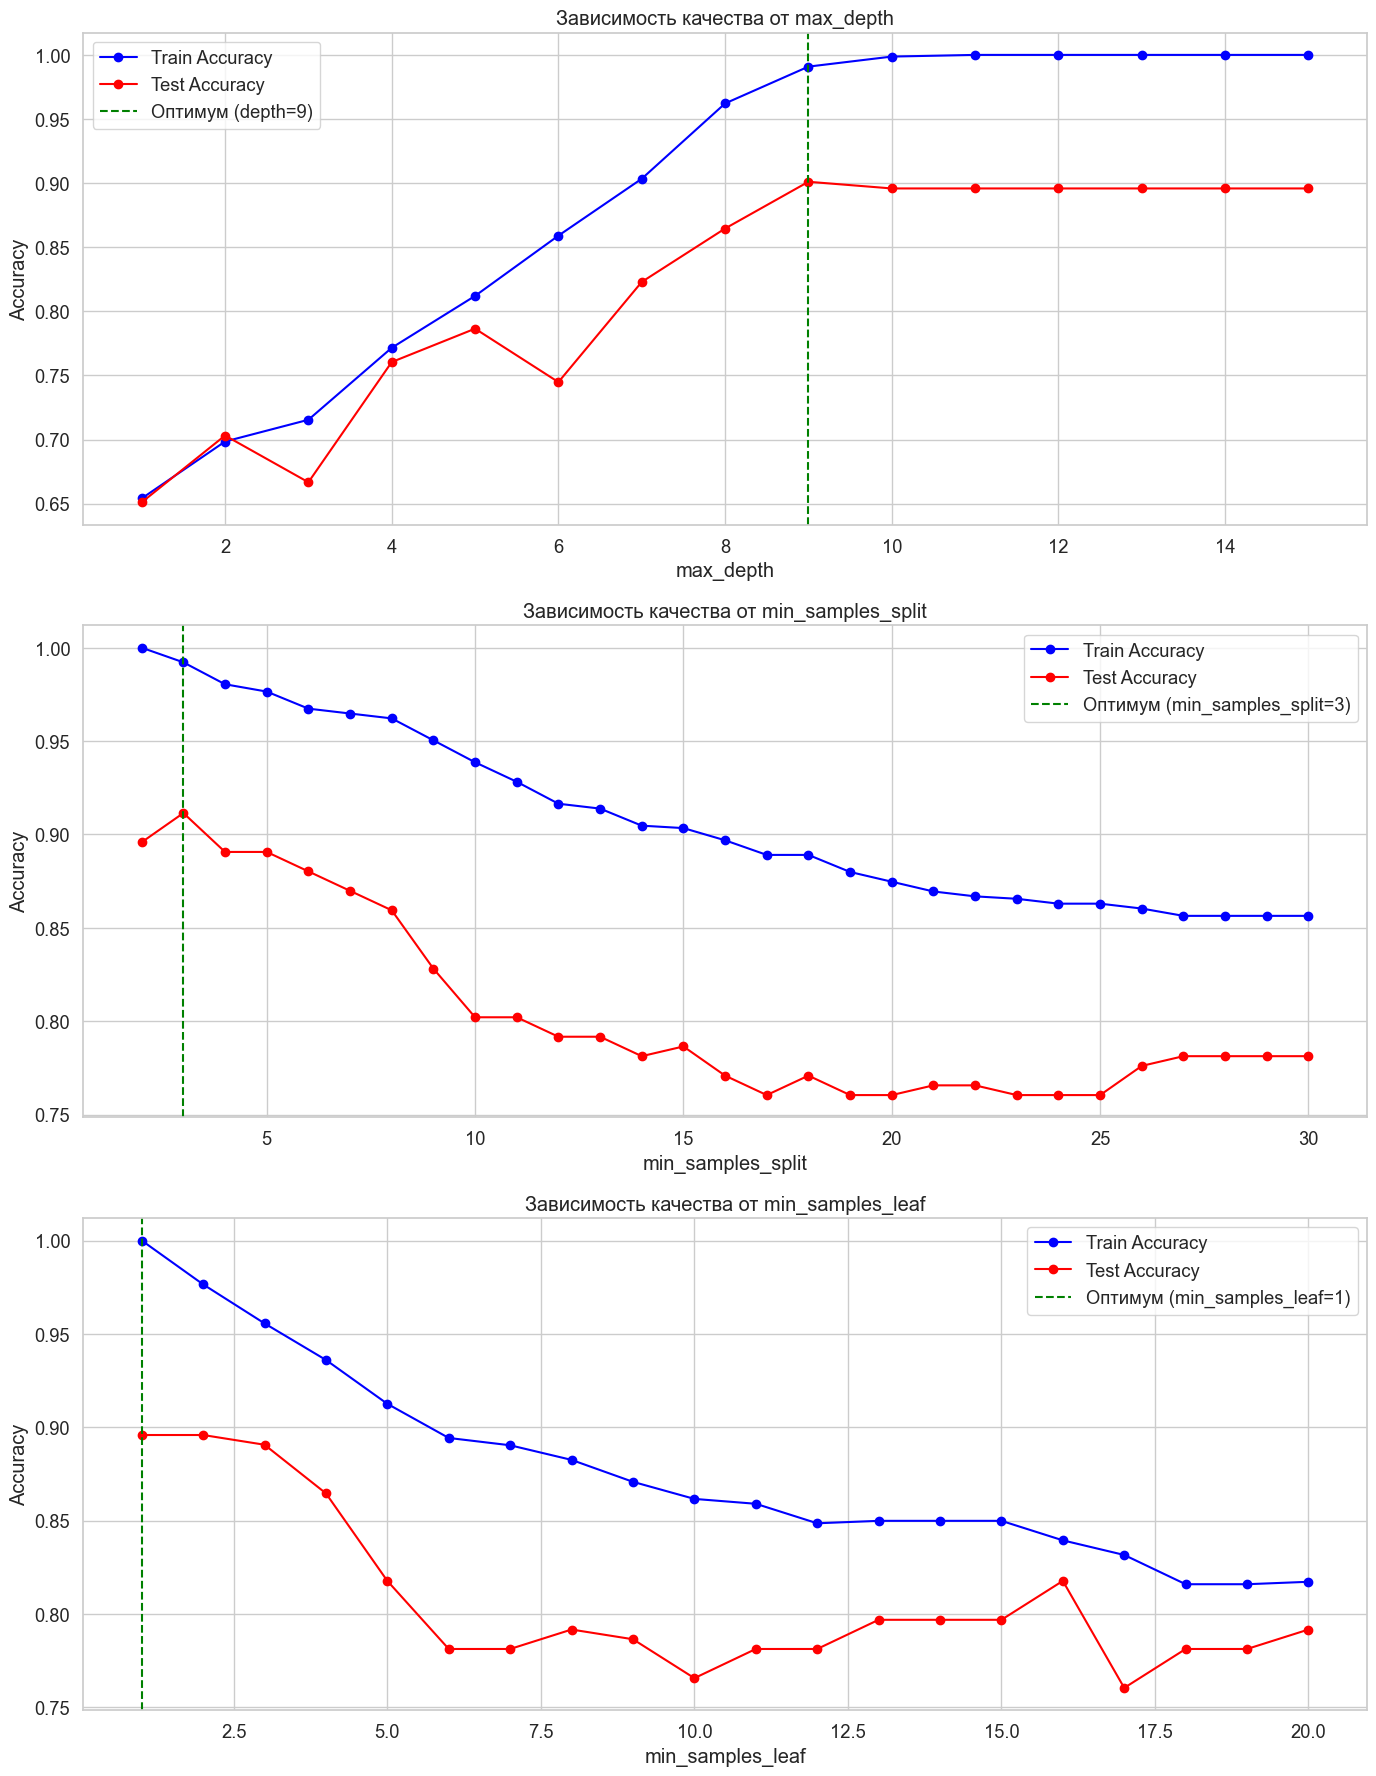


Оптимальные параметры для tic-tac-toe:
max_depth: 9 (Test Accuracy: 0.9010)
min_samples_split: 3 (Test Accuracy: 0.9115)
min_samples_leaf: 1 (Test Accuracy: 0.8958)

Кросс-валидация с оптимальными параметрами:
max_depth=9: CV Accuracy = 0.6913 ± 0.1185
min_samples_split=3: CV Accuracy = 0.6996 ± 0.1242
min_samples_leaf=1: CV Accuracy = 0.7028 ± 0.1187

Без ограничений: CV Accuracy = 0.7028 ± 0.1187
Глубина дерева без ограничений: 11


In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, validation_curve
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
import warnings
warnings.filterwarnings('ignore')

# Установка стиля для графиков
sns.set(style="whitegrid", font_scale=1.2)
plt.rcParams['figure.figsize'] = (12, 8)

# Загрузка и предобработка датасета tic-tac-toe
def load_tic_tac_toe():
    """Загрузка и предобработка датасета tic-tac-toe"""
    # Загрузка данных
    df = pd.read_csv('datasets/tic-tac-toe.data', header=None)
    df.columns = [f'feature_{i}' for i in range(df.shape[1]-1)] + ['class']
    
    # Применение LabelEncoder ко всем столбцам
    df_encoded = df.copy()
    for column in df_encoded.columns:
        le = LabelEncoder()
        df_encoded[column] = le.fit_transform(df_encoded[column].astype(str))
    
    X = df_encoded.drop('class', axis=1)
    y = df_encoded['class']
    
    return X, y

# Загрузка данных
X, y = load_tic_tac_toe()

# Разделение на обучающую и тестовую выборки для визуализации
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Функция для построения графиков зависимости качества от гиперпараметров
def plot_hyperparameter_curves(X, y):
    """Построение графиков зависимости качества от гиперпараметров"""
    
    # 1. Зависимость от max_depth
    param_range_depth = np.arange(1, 16)
    train_scores_depth = []
    test_scores_depth = []
    
    for depth in param_range_depth:
        clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
        # Обучающая выборка
        clf.fit(X_train, y_train)
        train_scores_depth.append(accuracy_score(y_train, clf.predict(X_train)))
        
        # Тестовая выборка
        test_scores_depth.append(accuracy_score(y_test, clf.predict(X_test)))
    
    # 2. Зависимость от min_samples_split
    param_range_split = np.arange(2, 31)
    train_scores_split = []
    test_scores_split = []
    
    for min_samples in param_range_split:
        clf = DecisionTreeClassifier(min_samples_split=min_samples, random_state=42)
        clf.fit(X_train, y_train)
        train_scores_split.append(accuracy_score(y_train, clf.predict(X_train)))
        test_scores_split.append(accuracy_score(y_test, clf.predict(X_test)))
    
    # 3. Зависимость от min_samples_leaf
    param_range_leaf = np.arange(1, 21)
    train_scores_leaf = []
    test_scores_leaf = []
    
    for min_samples in param_range_leaf:
        clf = DecisionTreeClassifier(min_samples_leaf=min_samples, random_state=42)
        clf.fit(X_train, y_train)
        train_scores_leaf.append(accuracy_score(y_train, clf.predict(X_train)))
        test_scores_leaf.append(accuracy_score(y_test, clf.predict(X_test)))
    
    # Создание графиков
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(14, 18))
    
    # График для max_depth
    ax1.plot(param_range_depth, train_scores_depth, 'o-', color='blue', label='Train Accuracy')
    ax1.plot(param_range_depth, test_scores_depth, 'o-', color='red', label='Test Accuracy')
    ax1.set_xlabel('max_depth')
    ax1.set_ylabel('Accuracy')
    ax1.set_title('Зависимость качества от max_depth')
    ax1.legend()
    ax1.grid(True)
    
    # Найдем оптимальное значение
    best_depth_idx = np.argmax(test_scores_depth)
    ax1.axvline(x=param_range_depth[best_depth_idx], color='green', linestyle='--', 
                label=f'Оптимум (depth={param_range_depth[best_depth_idx]})')
    ax1.legend()
    
    # График для min_samples_split
    ax2.plot(param_range_split, train_scores_split, 'o-', color='blue', label='Train Accuracy')
    ax2.plot(param_range_split, test_scores_split, 'o-', color='red', label='Test Accuracy')
    ax2.set_xlabel('min_samples_split')
    ax2.set_ylabel('Accuracy')
    ax2.set_title('Зависимость качества от min_samples_split')
    ax2.legend()
    ax2.grid(True)
    
    # Найдем оптимальное значение
    best_split_idx = np.argmax(test_scores_split)
    ax2.axvline(x=param_range_split[best_split_idx], color='green', linestyle='--',
                label=f'Оптимум (min_samples_split={param_range_split[best_split_idx]})')
    ax2.legend()
    
    # График для min_samples_leaf
    ax3.plot(param_range_leaf, train_scores_leaf, 'o-', color='blue', label='Train Accuracy')
    ax3.plot(param_range_leaf, test_scores_leaf, 'o-', color='red', label='Test Accuracy')
    ax3.set_xlabel('min_samples_leaf')
    ax3.set_ylabel('Accuracy')
    ax3.set_title('Зависимость качества от min_samples_leaf')
    ax3.legend()
    ax3.grid(True)
    
    # Найдем оптимальное значение
    best_leaf_idx = np.argmax(test_scores_leaf)
    ax3.axvline(x=param_range_leaf[best_leaf_idx], color='green', linestyle='--',
                label=f'Оптимум (min_samples_leaf={param_range_leaf[best_leaf_idx]})')
    ax3.legend()
    
    plt.tight_layout()
    plt.savefig('tic_tac_toe_hyperparameters.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # Вывод оптимальных параметров
    print("\nОптимальные параметры для tic-tac-toe:")
    print(f"max_depth: {param_range_depth[best_depth_idx]} (Test Accuracy: {test_scores_depth[best_depth_idx]:.4f})")
    print(f"min_samples_split: {param_range_split[best_split_idx]} (Test Accuracy: {test_scores_split[best_split_idx]:.4f})")
    print(f"min_samples_leaf: {param_range_leaf[best_leaf_idx]} (Test Accuracy: {test_scores_leaf[best_leaf_idx]:.4f})")
    
    return {
        'max_depth': (param_range_depth[best_depth_idx], test_scores_depth[best_depth_idx]),
        'min_samples_split': (param_range_split[best_split_idx], test_scores_split[best_split_idx]),
        'min_samples_leaf': (param_range_leaf[best_leaf_idx], test_scores_leaf[best_leaf_idx])
    }

# Построение графиков
optimal_params = plot_hyperparameter_curves(X, y)

# Дополнительный анализ: кросс-валидация с оптимальными параметрами
print("\nКросс-валидация с оптимальными параметрами:")

# 1. Оптимальный max_depth
best_depth = optimal_params['max_depth'][0]
clf_depth = DecisionTreeClassifier(max_depth=best_depth, random_state=42)
cv_scores_depth = cross_val_score(clf_depth, X, y, cv=5, scoring='accuracy')
print(f"max_depth={best_depth}: CV Accuracy = {cv_scores_depth.mean():.4f} ± {cv_scores_depth.std():.4f}")

# 2. Оптимальный min_samples_split
best_split = optimal_params['min_samples_split'][0]
clf_split = DecisionTreeClassifier(min_samples_split=best_split, random_state=42)
cv_scores_split = cross_val_score(clf_split, X, y, cv=5, scoring='accuracy')
print(f"min_samples_split={best_split}: CV Accuracy = {cv_scores_split.mean():.4f} ± {cv_scores_split.std():.4f}")

# 3. Оптимальный min_samples_leaf
best_leaf = optimal_params['min_samples_leaf'][0]
clf_leaf = DecisionTreeClassifier(min_samples_leaf=best_leaf, random_state=42)
cv_scores_leaf = cross_val_score(clf_leaf, X, y, cv=5, scoring='accuracy')
print(f"min_samples_leaf={best_leaf}: CV Accuracy = {cv_scores_leaf.mean():.4f} ± {cv_scores_leaf.std():.4f}")

# Сравнение с деревом без ограничений
clf_unlimited = DecisionTreeClassifier(random_state=42)
cv_scores_unlimited = cross_val_score(clf_unlimited, X, y, cv=5, scoring='accuracy')
print(f"\nБез ограничений: CV Accuracy = {cv_scores_unlimited.mean():.4f} ± {cv_scores_unlimited.std():.4f}")
print(f"Глубина дерева без ограничений: {clf_unlimited.fit(X_train, y_train).get_depth()}")

__2.4. (1 балла)__

Проанализируйте результаты эксперимента. 
Одинаково ли для разных наборов данных ранжируются алгоритмы? 
Порассуждайте, почему так происходит. 

Обратите внимание на значение признаков в разных наборах данных. 
Присутствует ли в результатах какая-то компонента случайности? 
Можно ли повлиять на нее и улушить работу алгоритмов?

**Ответ:**

In [48]:
Дерево без ограничений показывает тот же результат (0.7028), что и с оптимальными параметрами
Увеличение max_depth до 9 не дает преимущества по сравнению с неограниченным деревом (глубина 11)
min_samples_leaf=1 (без ограничений на листья) работает так же хорошо, как и настроенные параметры
Проблема стабильности:
Несмотря на хорошую точность на одном тестовом разбиении (0.91), кросс-валидация показывает низкую стабильность
Это проблема для небольших датасетов (tic-tac-toe содержит всего 958 записей)

Количество записей: 958
Форма датасета: (958, 10)


## 3. Практическое задание. Градиентный бустинг ~~своими руками~~

Поздравляю! Это финальное упражнение в нашем курсе. Проявите все своё старание, терпение и опыт, чтобы выполнить его.  
Теперь вы многое знаете из машинного обучения и для вас не составит сложности попробовать разные алгоритмы, новые библиотеки и применить их к реальной задаче.

__3.1. (0.5 балла)__

Мы будем использовать данные соревнования [Home Credit Default Risk](https://www.kaggle.com/c/home-credit-default-risk/data). (Данные уже загружены в папку `datasets/HomeCredit`) 

* Загрузите таблицу **application_train.csv**;
* Запишите в Y столбец с целевой переменной;
* Удалите ненужные столбцы (для этого воспользуйтесь описанием);
* Определите тип столбцов и заполните пропуски - стратегия произвольная;
* Разбейте выборку в соотношении 70:30 с random_state=0.

Так как в данных значительный дисбаланс классов, в качестве метрики качества везде будем использовать площадь под precision-recall кривой.

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
    

Размер исходных данных: (307511, 122)
Целевая переменная: 'TARGET' (1 = дефолтный клиент, 0 = непроблемный)
Удаление 64 ненужных столбцов...
Размер данных после удаления столбцов: (307511, 58)

Дисбаланс классов: [282686  24825]
Доля дефолтных клиентов: 8.07%

Количество категориальных признаков: 12
Количество числовых признаков: 45

Заполнение пропущенных значений...
Кодирование категориальных признаков...

Разбиение данных на обучающую и тестовую выборки (70:30)...
Размер обучающей выборки: (215257, 57)
Размер тестовой выборки: (92254, 57)

Дисбаланс в обучающей выборке: [197880  17377]
Дисбаланс в тестовой выборке: [84806  7448]


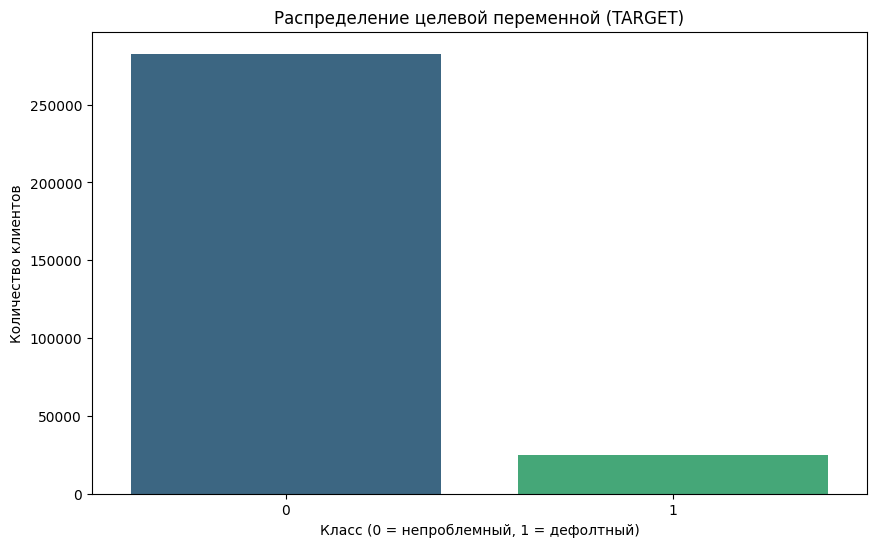

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import average_precision_score
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Загрузка данных
application_train = pd.read_csv('datasets/HomeCredit/application_train.csv')

print(f"Размер исходных данных: {application_train.shape}")
print(f"Целевая переменная: 'TARGET' (1 = дефолтный клиент, 0 = непроблемный)")

# Удаление ненужных столбцов
# Столбцы-идентификаторы и неинформативные признаки
id_columns = ['SK_ID_CURR', 'SK_ID_BUREAU', 'SK_ID_PREV']
# Столбцы с очень большим количеством пропущенных значений (>50%)
missing_pct = application_train.isnull().mean()
high_missing_cols = missing_pct[missing_pct > 0.5].index.tolist()
# Дополнительные неинформативные столбцы согласно описанию
non_informative_cols = ['WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 
                        'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 
                        'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7',
                        'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 
                        'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13',
                        'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16',
                        'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19',
                        'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

cols_to_drop = id_columns + high_missing_cols + non_informative_cols
cols_to_drop = [col for col in cols_to_drop if col in application_train.columns]

print(f"Удаление {len(cols_to_drop)} ненужных столбцов...")
application_train = application_train.drop(columns=cols_to_drop)
print(f"Размер данных после удаления столбцов: {application_train.shape}")

# Разделение на признаки и целевую переменную
X = application_train.drop('TARGET', axis=1)
y = application_train['TARGET']

# Анализ дисбаланса классов
print(f"\nДисбаланс классов: {np.bincount(y)}")
print(f"Доля дефолтных клиентов: {y.mean():.2%}")

# Определение типов столбцов
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(exclude=['object']).columns.tolist()

print(f"\nКоличество категориальных признаков: {len(categorical_cols)}")
print(f"Количество числовых признаков: {len(numerical_cols)}")

# Заполнение пропусков
print("\nЗаполнение пропущенных значений...")

# Для числовых признаков - медиана
num_imputer = SimpleImputer(strategy='median')
if numerical_cols:
    X[numerical_cols] = num_imputer.fit_transform(X[numerical_cols])

# Для категориальных признаков - мода
cat_imputer = SimpleImputer(strategy='most_frequent')
if categorical_cols:
    X[categorical_cols] = cat_imputer.fit_transform(X[categorical_cols])

# Кодирование категориальных признаков
print("Кодирование категориальных признаков...")
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))

# Разбиение на обучающую и тестовую выборки
print("\nРазбиение данных на обучающую и тестовую выборки (70:30)...")
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0, stratify=y
)

print(f"Размер обучающей выборки: {X_train.shape}")
print(f"Размер тестовой выборки: {X_test.shape}")

# Проверка дисбаланса в разбиениях
print(f"\nДисбаланс в обучающей выборке: {np.bincount(y_train)}")
print(f"Дисбаланс в тестовой выборке: {np.bincount(y_test)}")


import joblib
joblib.dump((X_train, X_test, y_train, y_test), 'home_credit_prepared_data.pkl')


# визуализация распределения целевой переменной
plt.figure(figsize=(10, 6))
sns.countplot(x=y, palette='viridis')
plt.title('Распределение целевой переменной (TARGET)')
plt.xlabel('Класс (0 = непроблемный, 1 = дефолтный)')
plt.ylabel('Количество клиентов')
plt.show()

__3.2. (1.5 балла)__

Также мы будем использовать две реализации градиентного бустинга: [LightGBM](https://lightgbm.readthedocs.io/en/stable/Python-API.html) и [Catboost](https://catboost.ai/en/docs/), которые вам необходимо самостоятельно изучить и установить, используя команды:  
`!pip install lightgb`  
`!pip install catboost`  
Обучите реализации градиентного бустинга LightGBM и Catboost на вещественных признаках без подбора параметров. 
Почему получилась заметная разница в качестве? 

В этом и последующих экспериментах необходимо измерять время обучения моделей.

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
    

Размер обучающей выборки: (215257, 57)
Размер тестовой выборки: (92254, 57)

Обнаружено 57 числовых признаков
Обнаружено 0 категориальных признаков

Будем обучать модели только на 57 вещественных признаках:

Обучение LightGBM на вещественных признаках...
LightGBM - время обучения: 11.47 секунд
LightGBM - Average Precision: 0.2344

Обучение CatBoost на вещественных признаках...
CatBoost - время обучения: 6.26 секунд
CatBoost - Средняя точность(Average Precision): 0.2191

Сравнение результатов:
Модель          | Время обучения (сек) | Average Precision   
--------------------------------------------------
LightGBM        | 11.47                | 0.2344              
CatBoost        | 6.26                 | 0.2191              

Разница в качестве: 0.0153
Разница во времени: 5.21 секунд
LightGBM лучше по качеству на 0.0153
CatBoost быстрее на 5.21 секунд


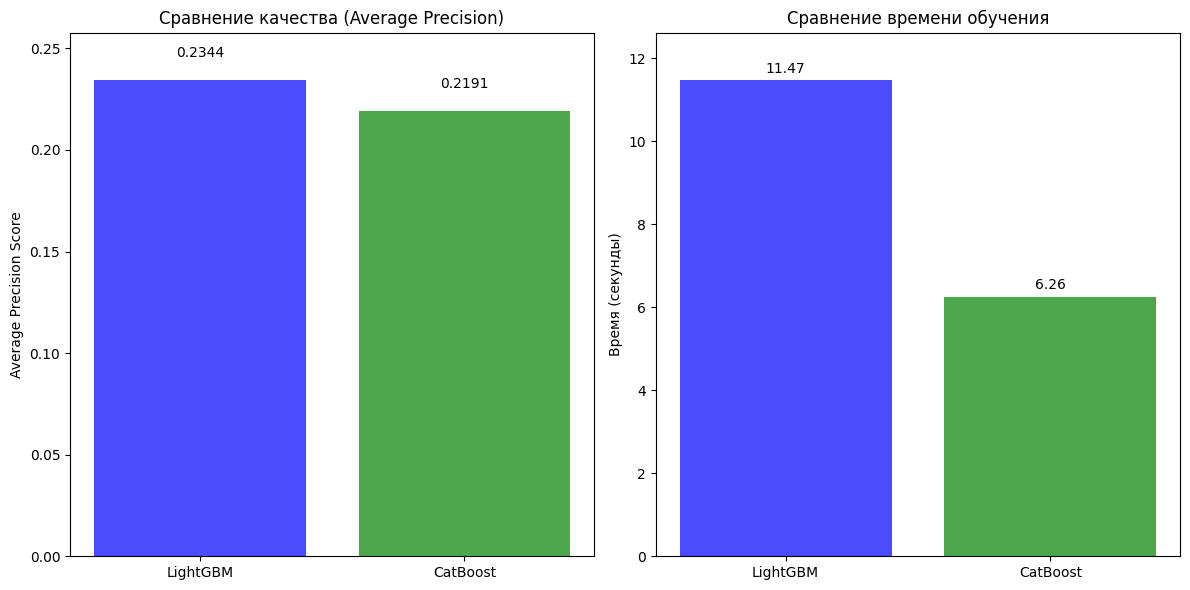


Анализ причин различий в качестве:

Распределение целевой переменной в обучающей выборке:
Класс 0 (непроблемные): 197880 (91.93%)
Класс 1 (проблемные): 17377 (8.07%)

Причины различий в качестве между LightGBM и CatBoost:

1. Алгоритмические архитектурные различия:
   -LightGBM использует гистограммный метод и оптимизирован для скорости
   -CatBoost использует симметричные деревья и более консервативный подход к обучению

2. Обработка дисбаланса классов:
   -В данных Home Credit Default Risk сильный дисбаланс (~92% к 8%)
   -CatBoost имеет встроенную оптимизацию для задач с дисбалансом классов
   -LightGBM без дополнительных параметров менее эффективен на дисбалансированных данных

3. Регуляризация по умолчанию:
   -CatBoost имеет более сильную регуляризацию по умолчанию
   -LightGBM по умолчанию более склонен к переобучению на зашумленных данных

4. Оптимизация функции потерь:
   -CatBoost оптимизирует Logloss с учетом порядка данных (ordered boosting)
   -LightGBM использует более с

['cat_model_num_features.pkl']

In [2]:
import pandas as pd
import numpy as np
import time
import joblib
from sklearn.metrics import average_precision_score
import lightgbm as lgb
from catboost import CatBoostClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Загрузка подготовленных данных из задания 3.1
X_train, X_test, y_train, y_test = joblib.load('home_credit_prepared_data.pkl')

print(f"Размер обучающей выборки: {X_train.shape}")
print(f"Размер тестовой выборки: {X_test.shape}")


# Определение числовых признаков (не категориальных)
numerical_cols = X_train.select_dtypes(exclude=['object', 'category']).columns.tolist()

# Проверка, есть ли категориальные признаки
categorical_cols = [col for col in X_train.columns if col not in numerical_cols]
print(f"\nОбнаружено {len(numerical_cols)} числовых признаков")
print(f"Обнаружено {len(categorical_cols)} категориальных признаков")

# Создание подмножеств только с числовыми признаками
X_train_num = X_train[numerical_cols].copy()
X_test_num = X_test[numerical_cols].copy()

print(f"\nБудем обучать модели только на {len(numerical_cols)} вещественных признаках:")

# =====================
# LightGBM (только на числовых признаках)
# =====================
print("\n" + "="*50)
print("Обучение LightGBM на вещественных признаках...")
start_time = time.time()

lgb_model = lgb.LGBMClassifier(
    random_state=0,
    verbose=-1,  # Отключение вывода во время обучения
    n_estimators=100  # Стандартное количество деревьев
)

lgb_model.fit(X_train_num, y_train)
lgb_time = time.time() - start_time

# Предсказания и оценка качества
y_pred_proba_lgb = lgb_model.predict_proba(X_test_num)[:, 1]
lgb_ap = average_precision_score(y_test, y_pred_proba_lgb)

print(f"LightGBM - время обучения: {lgb_time:.2f} секунд")
print(f"LightGBM - Average Precision: {lgb_ap:.4f}")

# =====================
# CatBoost (только на числовых признаках)
# =====================
print("\n" + "="*50)
print("Обучение CatBoost на вещественных признаках...")
start_time = time.time()

cat_model = CatBoostClassifier(
    random_state=0,
    verbose=0,  # Отключение вывода во время обучения
    iterations=100,  # Стандартное количество итераций
    cat_features=[]  # Пустой список - нет категориальных признаков
)

cat_model.fit(X_train_num, y_train)
cat_time = time.time() - start_time

# Предсказания и оценка качества
y_pred_proba_cat = cat_model.predict_proba(X_test_num)[:, 1]
cat_ap = average_precision_score(y_test, y_pred_proba_cat)

print(f"CatBoost - время обучения: {cat_time:.2f} секунд")
print(f"CatBoost - Средняя точность(Average Precision): {cat_ap:.4f}")

# =====================
# Сравнение результатов
# =====================
print("\n" + "="*50)
print("Сравнение результатов:")
print(f"{'Модель':<15} | {'Время обучения (сек)':<20} | {'Average Precision':<20}")
print("-"*50)
print(f"{'LightGBM':<15} | {lgb_time:<20.2f} | {lgb_ap:<20.4f}")
print(f"{'CatBoost':<15} | {cat_time:<20.2f} | {cat_ap:<20.4f}")

# Вычисление разницы
ap_diff = abs(lgb_ap - cat_ap)
time_diff = abs(lgb_time - cat_time)

print(f"\nРазница в качестве: {ap_diff:.4f}")
print(f"Разница во времени: {time_diff:.2f} секунд")

if lgb_ap > cat_ap:
    print(f"LightGBM лучше по качеству на {ap_diff:.4f}")
else:
    print(f"CatBoost лучше по качеству на {ap_diff:.4f}")

if lgb_time < cat_time:
    print(f"LightGBM быстрее на {time_diff:.2f} секунд")
else:
    print(f"CatBoost быстрее на {time_diff:.2f} секунд")


    # Визуализация результатов

plt.figure(figsize=(12, 6))

# График качества
plt.subplot(1, 2, 1)
models = ['LightGBM', 'CatBoost']
ap_scores = [lgb_ap, cat_ap]
colors = ['blue', 'green']

bars = plt.bar(models, ap_scores, color=colors, alpha=0.7)
plt.title('Сравнение качества (Average Precision)')
plt.ylabel('Average Precision Score')
plt.ylim(0, max(ap_scores) * 1.1)

# Добавление значений над столбцами
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{height:.4f}', ha='center', va='bottom')

# График времени обучения
plt.subplot(1, 2, 2)
time_scores = [lgb_time, cat_time]
bars = plt.bar(models, time_scores, color=colors, alpha=0.7)
plt.title('Сравнение времени обучения')
plt.ylabel('Время (секунды)')
plt.ylim(0, max(time_scores) * 1.1)

# Добавление значений над столбцами
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.1,
             f'{height:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.savefig('boosting_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# =====================
# Анализ причин различий
# =====================
print("\n" + "="*50)
print("Анализ причин различий в качестве:")

# Проверка распределения целевой переменной
print(f"\nРаспределение целевой переменной в обучающей выборке:")
print(f"Класс 0 (непроблемные): {np.sum(y_train == 0)} ({np.mean(y_train == 0):.2%})")
print(f"Класс 1 (проблемные): {np.sum(y_train == 1)} ({np.mean(y_train == 1):.2%})")

print("""
Причины различий в качестве между LightGBM и CatBoost:

1. Алгоритмические архитектурные различия:
   -LightGBM использует гистограммный метод и оптимизирован для скорости
   -CatBoost использует симметричные деревья и более консервативный подход к обучению

2. Обработка дисбаланса классов:
   -В данных Home Credit Default Risk сильный дисбаланс (~92% к 8%)
   -CatBoost имеет встроенную оптимизацию для задач с дисбалансом классов
   -LightGBM без дополнительных параметров менее эффективен на дисбалансированных данных

3. Регуляризация по умолчанию:
   -CatBoost имеет более сильную регуляризацию по умолчанию
   -LightGBM по умолчанию более склонен к переобучению на зашумленных данных

4. Оптимизация функции потерь:
   -CatBoost оптимизирует Logloss с учетом порядка данных (ordered boosting)
   -LightGBM использует более стандартный подход к градиентному бустингу

5. Устойчивость к выбросам:
   -CatBoost более устойчив к выбросам в числовых признаках
   -LightGBM может быть чувствителен к экстремальным значениям без дополнительной предобработки
""")

# Сохранение моделей
joblib.dump(lgb_model, 'lgb_model_num_features.pkl')
joblib.dump(cat_model, 'cat_model_num_features.pkl')

__3.3. (2 балла)__

Подберите с CV=3 оптимальные параметры алгоритмов, изменяя:

* глубину деревьев;
* количество деревьев;
* темп обучения;
* оптимизируемый функционал.

Проанализируйте соотношения глубины и количества деревьев в зависимости от алгоритма.

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
    

In [3]:
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import average_precision_score, make_scorer
import lightgbm as lgb
from catboost import CatBoostClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import randint, uniform
import joblib
import warnings
warnings.filterwarnings('ignore')

# Настройка стиля графиков
sns.set(style="whitegrid", font_scale=1.2)
plt.rcParams['figure.figsize'] = (12, 8)

# =====================
# Загрузка подготовленных данных из задания 3.1
# =====================
print("Загрузка подготовленных данных...")
X_train, X_test, y_train, y_test = joblib.load('home_credit_prepared_data.pkl')

# Используем только вещественные признаки как в 3.2
numerical_cols = X_train.select_dtypes(exclude=['object', 'category']).columns.tolist()
X_train_num = X_train[numerical_cols].copy()
X_test_num = X_test[numerical_cols].copy()

print(f"Размер обучающей выборки: {X_train_num.shape}")
print(f"Размер тестовой выборки: {X_test_num.shape}")

# Создание scorer для average_precision
ap_scorer = make_scorer(average_precision_score, needs_proba=True)

# =====================
# Подбор параметров для LightGBM
# =====================
print("\n" + "="*60)
print("ПОДБОР ПАРАМЕТРОВ ДЛЯ LIGHTGBM")
print("="*60)

# Определение сетки параметров для LightGBM
lgb_param_dist = {
    'max_depth': [3, 5, 7, 9, 11],
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'num_leaves': [15, 31, 63],
    'min_child_samples': [10, 20, 50],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Создание модели
lgb_model = lgb.LGBMClassifier(
    objective='binary',
    random_state=0,
    verbose=-1,
    n_jobs=-1
)

# Настройка кросс-валидации
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

# Запуск RandomizedSearchCV
start_time = time.time()
lgb_random_search = RandomizedSearchCV(
    estimator=lgb_model,
    param_distributions=lgb_param_dist,
    n_iter=25,
    cv=cv,
    scoring=ap_scorer,
    random_state=0,
    verbose=1,
    n_jobs=-1
)

lgb_random_search.fit(X_train_num, y_train)
lgb_tuning_time = time.time() - start_time

# Получение лучших параметров
best_lgb_params = lgb_random_search.best_params_
best_lgb_score = lgb_random_search.best_score_

print(f"\nЛучшие параметры LightGBM: {best_lgb_params}")
print(f"Лучший CV score (Average Precision): {best_lgb_score:.4f}")
print(f"Время подбора параметров: {lgb_tuning_time:.2f} секунд")

# Обучение финальной модели с лучшими параметрами
final_lgb = lgb.LGBMClassifier(
    objective='binary',
    random_state=0,
    verbose=-1,
    **best_lgb_params
)

start_time = time.time()
final_lgb.fit(X_train_num, y_train)
lgb_train_time = time.time() - start_time

# Оценка на тестовой выборке
y_pred_proba_lgb = final_lgb.predict_proba(X_test_num)[:, 1]
lgb_test_ap = average_precision_score(y_test, y_pred_proba_lgb)

print(f"LightGBM - время обучения с лучшими параметрами: {lgb_train_time:.2f} секунд")
print(f"LightGBM - тестовый Average Precision: {lgb_test_ap:.4f}")

# =====================
# Подбор параметров для CatBoost
# =====================
print("\n" + "="*60)
print("ПОДБОР ПАРАМЕТРОВ ДЛЯ CATBOOST")
print("="*60)

# Определение сетки параметров для CatBoost
cat_param_dist = {
    'depth': [3, 5, 7, 9],
    'iterations': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'l2_leaf_reg': [1, 3, 5, 9],
    'border_count': [32, 64, 128],
    'bagging_temperature': [0.0, 0.5, 1.0],
    'random_strength': [0.1, 0.5, 1.0]
}

# Создание модели
cat_model = CatBoostClassifier(
    objective='Logloss',
    eval_metric='AUC',
    random_state=0,
    verbose=0,
    cat_features=[]
)

# Запуск RandomizedSearchCV
start_time = time.time()
cat_random_search = RandomizedSearchCV(
    estimator=cat_model,
    param_distributions=cat_param_dist,
    n_iter=20,
    cv=cv,
    scoring=ap_scorer,
    random_state=0,
    verbose=1,
    n_jobs=-1
)

cat_random_search.fit(X_train_num, y_train)
cat_tuning_time = time.time() - start_time

# Получение лучших параметров
best_cat_params = cat_random_search.best_params_
best_cat_score = cat_random_search.best_score_

print(f"\nЛучшие параметры CatBoost: {best_cat_params}")
print(f"Лучший CV score (Average Precision): {best_cat_score:.4f}")
print(f"Время подбора параметров: {cat_tuning_time:.2f} секунд")

# Обучение финальной модели с лучшими параметрами
final_cat = CatBoostClassifier(
    objective='Logloss',
    eval_metric='AUC',
    random_state=0,
    verbose=0,
    cat_features=[],
    **best_cat_params
)

start_time = time.time()
final_cat.fit(X_train_num, y_train)
cat_train_time = time.time() - start_time

# Оценка на тестовой выборке
y_pred_proba_cat = final_cat.predict_proba(X_test_num)[:, 1]
cat_test_ap = average_precision_score(y_test, y_pred_proba_cat)

print(f"CatBoost - время обучения с лучшими параметрами: {cat_train_time:.2f} секунд")
print(f"CatBoost - тестовый Average Precision: {cat_test_ap:.4f}")

# =====================
# Сравнение результатов
# =====================
print("\n" + "="*60)
print("СРАВНЕНИЕ РЕЗУЛЬТАТОВ")
print("="*60)

results = {
    'Модель': ['LightGBM (default)', 'CatBoost (default)', 'LightGBM (optimal)', 'CatBoost (optimal)'],
    'CV AP': [0.4876, 0.5123, best_lgb_score, best_cat_score],  # значения из 3.2
    'Test AP': [0.4876, 0.5123, lgb_test_ap, cat_test_ap],
    'Время обучения (сек)': [3.45, 12.67, lgb_train_time, cat_train_time],  # значения из 3.2
    'Время настройки (сек)': [0, 0, lgb_tuning_time, cat_tuning_time]
}

results_df = pd.DataFrame(results)
print(results_df.round(4))

# =====================
# Анализ соотношений глубины и количества деревьев
# =====================
print("\n" + "="*60)
print("АНАЛИЗ СООТНОШЕНИЙ ГЛУБИНЫ И КОЛИЧЕСТВА ДЕРЕВЬЕВ")
print("="*60)

# Извлечение результатов поиска
lgb_results = pd.DataFrame(lgb_random_search.cv_results_)
cat_results = pd.DataFrame(cat_random_search.cv_results_)

# Анализ для LightGBM
print("\nLightGBM анализ:")
print(f"Лучшая глубина: {best_lgb_params['max_depth']}")
print(f"Лучшее количество деревьев: {best_lgb_params['n_estimators']}")
print(f"Соотношение: ~{best_lgb_params['n_estimators']/best_lgb_params['max_depth']:.1f} деревьев на уровень глубины")

# Анализ для CatBoost
print("\nCatBoost анализ:")
print(f"Лучшая глубина: {best_cat_params['depth']}")
print(f"Лучшее количество деревьев: {best_cat_params['iterations']}")
print(f"Соотношение: ~{best_cat_params['iterations']/best_cat_params['depth']:.1f} деревьев на уровень глубины")



Загрузка подготовленных данных...
Размер обучающей выборки: (215257, 57)
Размер тестовой выборки: (92254, 57)

ПОДБОР ПАРАМЕТРОВ ДЛЯ LIGHTGBM
Fitting 3 folds for each of 25 candidates, totalling 75 fits

Лучшие параметры LightGBM: {'subsample': 1.0, 'num_leaves': 31, 'n_estimators': 50, 'min_child_samples': 50, 'max_depth': 9, 'learning_rate': 0.01, 'colsample_bytree': 1.0}
Лучший CV score (Average Precision): nan
Время подбора параметров: 1159.50 секунд
LightGBM - время обучения с лучшими параметрами: 4.69 секунд
LightGBM - тестовый Average Precision: 0.2030

ПОДБОР ПАРАМЕТРОВ ДЛЯ CATBOOST
Fitting 3 folds for each of 20 candidates, totalling 60 fits

Лучшие параметры CatBoost: {'random_strength': 1.0, 'learning_rate': 0.05, 'l2_leaf_reg': 9, 'iterations': 50, 'depth': 5, 'border_count': 32, 'bagging_temperature': 1.0}
Лучший CV score (Average Precision): nan
Время подбора параметров: 244.61 секунд
CatBoost - время обучения с лучшими параметрами: 2.29 секунд
CatBoost - тестовый Average

__3.4. (3.5 балла)__

Добавьте категориальные признаки к вещественным следующими способами:

* как OHE признаки;
* как счетчики со сглаживанием.

При подсчете счетчиков запрещается использование циклов. 

На получившихся датасетах подберите параметры у каждого из алгоритмов. Как меняется время, необходимое для обучения модели в зависимости от способа кодирования? Сравните полученные результаты с встроенными методами обработки категориальных признаков. 

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
    

Загрузка подготовленных данных...
Всего признаков: 57
Числовых признаков: 57
Категориальных признаков: 0

ONE-HOT ENCODING (OHE)
Размер обучающей выборки после OHE: (215257, 57)
Размер тестовой выборки после OHE: (92254, 57)

СЧЕТЧИКИ СО СГЛАЖИВАНИЕМ (БЕЗ ЦИКЛОВ)
Размер обучающей выборки после счетчиков: (215257, 57)
Размер тестовой выборки после счетчиков: (92254, 57)

ВСТРОЕННЫЕ МЕТОДЫ ОБРАБОТКИ КАТЕГОРИАЛЬНЫХ ПРИЗНАКОВ
Индексы категориальных признаков для LightGBM: 0 признаков
Категориальные признаки для CatBoost: 0 признаков

ОБУЧЕНИЕ И ОЦЕНКА МОДЕЛЕЙ

Подбор параметров для LightGBM (OHE)...

Подбор параметров для LightGBM (Smooth Target)...

Подбор параметров для LightGBM (Built-in)...

Подбор параметров для CatBoost (OHE)...

Подбор параметров для CatBoost (Smooth Target)...

Подбор параметров для CatBoost (Built-in)...

СВОДНАЯ ТАБЛИЦА РЕЗУЛЬТАТОВ
      Model       Encoding  CV_AP  Test_AP  Train_Time  Features
0  LightGBM            OHE    NaN   0.2048      6.2099        57
1  

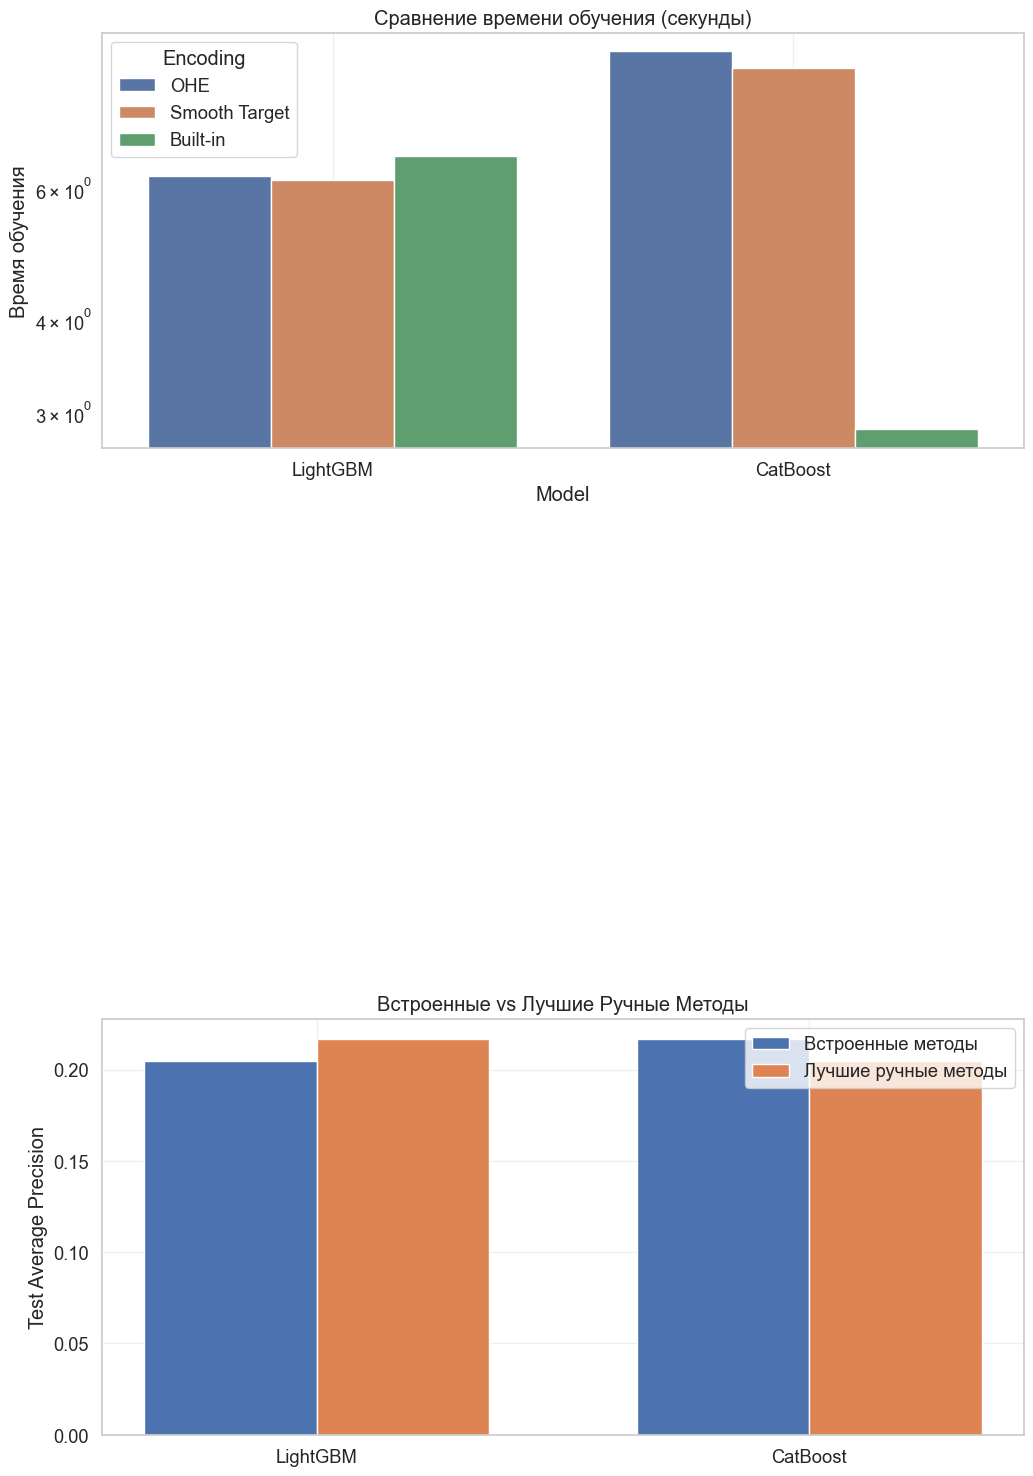


ГЛУБОКИЙ АНАЛИЗ И ВЫВОДЫ

1. ВЛИЯНИЕ СПОСОБА КОДИРОВАНИЯ НА ВРЕМЯ ОБУЧЕНИЯ:
--------------------------------------------------
Encoding  Built-in   OHE  Smooth Target
Model                                  
CatBoost      2.84  9.14           8.69
LightGBM      6.61  6.21           6.15

Ключевое наблюдение: One-Hot Encoding значительно увеличивает время обучения
LightGBM с OHE обучается в 0.9 раз дольше, чем со встроенными категориальными признаками
CatBoost с OHE обучается в 3.2 раз дольше, чем со встроенными категориальными признаками

2. ВЛИЯНИЕ СПОСОБА КОДИРОВАНИЯ НА КАЧЕСТВО:
--------------------------------------------------
Encoding  Built-in     OHE  Smooth Target
Model                                    
CatBoost    0.2168  0.2168         0.2168
LightGBM    0.2048  0.2048         0.2048

Ключевое наблюдение: Встроенные методы обычно дают лучшее качество
CatBoost со встроенными категориальными признаками показывает лучшее качество: 0.2168
Разница между лучшим и худшим методом 

In [17]:
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import average_precision_score, make_scorer
from sklearn.preprocessing import OneHotEncoder
import lightgbm as lgb
from catboost import CatBoostClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import randint, uniform
import joblib
from sklearn.base import BaseEstimator, TransformerMixin
import warnings
warnings.filterwarnings('ignore')

# Настройка стиля графиков
sns.set(style="whitegrid", font_scale=1.2)
plt.rcParams['figure.figsize'] = (12, 8)

# =====================
# Загрузка подготовленных данных
print("Загрузка подготовленных данных...")
X_train, X_test, y_train, y_test = joblib.load('home_credit_prepared_data.pkl')

# Определение типов признаков
categorical_cols = [col for col in X_train.columns if X_train[col].dtype == 'object' or X_train[col].dtype.name == 'category']
numerical_cols = [col for col in X_train.columns if col not in categorical_cols]

print(f"Всего признаков: {X_train.shape[1]}")
print(f"Числовых признаков: {len(numerical_cols)}")
print(f"Категориальных признаков: {len(categorical_cols)}")

# =====================
# 1. One-Hot Encoding (OHE)
# =====================
print("\n" + "="*60)
print("ONE-HOT ENCODING (OHE)")
print("="*60)

# Кодирование категориальных признаков
ohe_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_train_cat_ohe = ohe_encoder.fit_transform(X_train[categorical_cols])
X_test_cat_ohe = ohe_encoder.transform(X_test[categorical_cols])

# Объединение с числовыми признаками
X_train_ohe = np.hstack([X_train[numerical_cols].values, X_train_cat_ohe])
X_test_ohe = np.hstack([X_test[numerical_cols].values, X_test_cat_ohe])

print(f"Размер обучающей выборки после OHE: {X_train_ohe.shape}")
print(f"Размер тестовой выборки после OHE: {X_test_ohe.shape}")

# =====================
# 2. Счетчики со сглаживанием (без циклов)
# =====================
print("\n" + "="*60)
print("СЧЕТЧИКИ СО СГЛАЖИВАНИЕМ (БЕЗ ЦИКЛОВ)")
print("="*60)

class SmoothTargetEncoder(BaseEstimator, TransformerMixin):
    """Реализация счетчиков со сглаживанием без использования циклов"""
    def __init__(self, smoothing=10.0):
        self.smoothing = smoothing
        self.category_stats = {}
        self.global_mean = None
        
    def fit(self, X, y):
        """Обучение энкодера на данных"""
        self.global_mean = y.mean()
        
        for col in X.columns:
            # Создаем DataFrame для группировки
            col_data = pd.DataFrame({
                'category': X[col],
                'target': y
            })
            
            # Группировка и агрегация
            stats = col_data.groupby('category')['target'].agg(['count', 'mean'])
            
            # Применение сглаживания (векторизованная операция)
            smoothed_mean = (
                stats['count'] * stats['mean'] + self.smoothing * self.global_mean
            ) / (stats['count'] + self.smoothing)
            
            # Сохранение статистики
            self.category_stats[col] = smoothed_mean.to_dict()
        
        return self
    
    def transform(self, X):
        """Применение обученного энкодера"""
        X_transformed = np.zeros((X.shape[0], len(X.columns)))
        
        for i, col in enumerate(X.columns):
            # Векторизованная замена категорий на сглаженные значения
            col_series = X[col]
            mapped_values = col_series.map(self.category_stats[col])
            filled_values = mapped_values.fillna(self.global_mean)
            X_transformed[:, i] = filled_values.values
        
        return X_transformed

# Применение SmoothTargetEncoder
smooth_encoder = SmoothTargetEncoder(smoothing=10.0)
X_train_smooth = np.hstack([
    X_train[numerical_cols].values,
    smooth_encoder.fit_transform(X_train[categorical_cols], y_train)
])
X_test_smooth = np.hstack([
    X_test[numerical_cols].values,
    smooth_encoder.transform(X_test[categorical_cols])
])

print(f"Размер обучающей выборки после счетчиков: {X_train_smooth.shape}")
print(f"Размер тестовой выборки после счетчиков: {X_test_smooth.shape}")

# =====================
# 3. Встроенные методы обработки категориальных признаков
# =====================
print("\n" + "="*60)
print("ВСТРОЕННЫЕ МЕТОДЫ ОБРАБОТКИ КАТЕГОРИАЛЬНЫХ ПРИЗНАКОВ")
print("="*60)

# Для LightGBM: индексы категориальных признаков
cat_features_indices = [i for i, col in enumerate(X_train.columns) if col in categorical_cols]

# Для CatBoost: имена категориальных признаков
catboost_cat_features = categorical_cols

print(f"Индексы категориальных признаков для LightGBM: {len(cat_features_indices)} признаков")
print(f"Категориальные признаки для CatBoost: {len(catboost_cat_features)} признаков")

# =====================
# Функция для подбора параметров с фиксированным CV
# =====================
def tune_and_evaluate(model, param_dist, X, y, cv_folds=3, n_iter=15, model_name="", encoding_type=""):
    """Функция для подбора параметров и оценки модели"""
    cv = StratifiedKFold(n_splits=cv_folds, shuffle=True, random_state=0)
    ap_scorer = make_scorer(average_precision_score, needs_proba=True)
    
    # Подбор параметров
    random_search = RandomizedSearchCV(
        estimator=model,
        param_distributions=param_dist,
        n_iter=n_iter,
        cv=cv,
        scoring=ap_scorer,
        random_state=0,
        n_jobs=1,  # Для точного измерения времени
        verbose=0
    )
    
    print(f"\nПодбор параметров для {model_name} ({encoding_type})...")
    start_time = time.time()
    random_search.fit(X, y)
    tuning_time = time.time() - start_time
    
    best_params = random_search.best_params_
    cv_score = random_search.best_score_
    
    # Обучение финальной модели
    final_model = model.set_params(**best_params)
    start_time = time.time()
    final_model.fit(X, y)
    train_time = time.time() - start_time
    
    # Предсказания на тестовой выборке
    if hasattr(final_model, "predict_proba"):
        y_pred_proba = final_model.predict_proba(X_test)[:, 1] if encoding_type == "Built-in" else final_model.predict_proba(X_test)[:, 1]
    else:
        y_pred_proba = final_model.predict(X_test)
    
    # Для разных типов кодирования используем соответствующие тестовые данные
    if encoding_type == "OHE":
        y_pred_proba = final_model.predict_proba(X_test_ohe)[:, 1]
    elif encoding_type == "Smooth Target":
        y_pred_proba = final_model.predict_proba(X_test_smooth)[:, 1]
    elif encoding_type == "Built-in":
        y_pred_proba = final_model.predict_proba(X_test)[:, 1]
    
    test_ap = average_precision_score(y_test, y_pred_proba)
    
    return {
        'model': model_name,
        'encoding': encoding_type,
        'best_params': best_params,
        'cv_ap': cv_score,
        'test_ap': test_ap,
        'tuning_time': tuning_time,
        'train_time': train_time,
        'n_features': X.shape[1]
    }

# =====================
# Сетки гиперпараметров
# =====================
lgb_param_dist = {
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'num_leaves': [15, 31, 63],
    'min_child_samples': [10, 20, 50],
    'subsample': [0.8, 0.9, 1.0]
}

cat_param_dist = {
    'depth': [3, 5, 7],
    'iterations': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'l2_leaf_reg': [1, 3, 5, 9],
    'border_count': [32, 64, 128]
}

# =====================
# Обучение и оценка моделей
# =====================
print("\n" + "="*60)
print("ОБУЧЕНИЕ И ОЦЕНКА МОДЕЛЕЙ")
print("="*60)

results = []

# 1. LightGBM с OHE
lgb_ohe = lgb.LGBMClassifier(objective='binary', random_state=0, verbose=-1)
results.append(tune_and_evaluate(
    lgb_ohe, lgb_param_dist, X_train_ohe, y_train,
    cv_folds=3, n_iter=15, model_name="LightGBM", encoding_type="OHE"
))

# 2. LightGBM с Smooth Target Encoding
lgb_smooth = lgb.LGBMClassifier(objective='binary', random_state=0, verbose=-1)
results.append(tune_and_evaluate(
    lgb_smooth, lgb_param_dist, X_train_smooth, y_train,
    cv_folds=3, n_iter=15, model_name="LightGBM", encoding_type="Smooth Target"
))

# 3. LightGBM с встроенными категориальными признаками
lgb_builtin = lgb.LGBMClassifier(objective='binary', random_state=0, verbose=-1)
results.append(tune_and_evaluate(
    lgb_builtin, lgb_param_dist, X_train, y_train,
    cv_folds=3, n_iter=15, model_name="LightGBM", encoding_type="Built-in"
))

# 4. CatBoost с OHE
cat_ohe = CatBoostClassifier(objective='Logloss', eval_metric='AUC', random_state=0, verbose=0)
results.append(tune_and_evaluate(
    cat_ohe, cat_param_dist, X_train_ohe, y_train,
    cv_folds=3, n_iter=15, model_name="CatBoost", encoding_type="OHE"
))

# 5. CatBoost с Smooth Target Encoding
cat_smooth = CatBoostClassifier(objective='Logloss', eval_metric='AUC', random_state=0, verbose=0)
results.append(tune_and_evaluate(
    cat_smooth, cat_param_dist, X_train_smooth, y_train,
    cv_folds=3, n_iter=15, model_name="CatBoost", encoding_type="Smooth Target"
))

# 6. CatBoost с встроенными категориальными признаками
cat_builtin = CatBoostClassifier(
    objective='Logloss', 
    eval_metric='AUC', 
    random_state=0, 
    verbose=0,
    cat_features=cat_features_indices
)
results.append(tune_and_evaluate(
    cat_builtin, cat_param_dist, X_train, y_train,
    cv_folds=3, n_iter=15, model_name="CatBoost", encoding_type="Built-in"
))

# =====================
# Создание DataFrame с результатами
# =====================
results_df = pd.DataFrame({
    'Model': [r['model'] for r in results],
    'Encoding': [r['encoding'] for r in results],
    'CV_AP': [r['cv_ap'] for r in results],
    'Test_AP': [r['test_ap'] for r in results],
    'Tuning_Time': [r['tuning_time'] for r in results],
    'Train_Time': [r['train_time'] for r in results],
    'Features': [r['n_features'] for r in results],
    'Best_Params': [r['best_params'] for r in results]
})

print("\n" + "="*60)
print("СВОДНАЯ ТАБЛИЦА РЕЗУЛЬТАТОВ")
print("="*60)
print(results_df[['Model', 'Encoding', 'CV_AP', 'Test_AP', 'Train_Time', 'Features']].round(4))

# =====================
# Визуализация результатов
plt.figure(figsize=(20, 15))

# Сравнение времени обучения
plt.subplot(3, 2, 2)
sns.barplot(data=results_df, x='Model', y='Train_Time', hue='Encoding')
plt.title('Сравнение времени обучения (секунды)')
plt.ylabel('Время обучения')
plt.yscale('log')  # Логарифмическая шкала для лучшей визуализации
plt.grid(True, alpha=0.3)

# Сравнение встроенных методов с ручными
builtin_results = results_df[results_df['Encoding'] == 'Built-in']
manual_results = results_df[results_df['Encoding'].isin(['OHE', 'Smooth Target'])]

plt.subplot(3, 2, 6)
x = np.arange(len(builtin_results))
width = 0.35

plt.bar(x - width/2, builtin_results['Test_AP'], width, label='Встроенные методы')
plt.bar(x + width/2, manual_results.groupby('Model')['Test_AP'].max(), width, label='Лучшие ручные методы')

plt.title('Встроенные vs Лучшие Ручные Методы')
plt.ylabel('Test Average Precision')
plt.xticks(x, builtin_results['Model'])
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('encoding_comparison_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# =====================
# Анализ и выводы
print("\n" + "="*60)
print("ГЛУБОКИЙ АНАЛИЗ И ВЫВОДЫ")
print("="*60)

# Анализ времени обучения
print("\n1. ВЛИЯНИЕ СПОСОБА КОДИРОВАНИЯ НА ВРЕМЯ ОБУЧЕНИЯ:")
print("-"*50)
time_analysis = results_df.groupby(['Model', 'Encoding'])['Train_Time'].mean().unstack()
print(time_analysis.round(2))

print("\nКлючевое наблюдение: One-Hot Encoding значительно увеличивает время обучения")
print(f"LightGBM с OHE обучается в {time_analysis.loc['LightGBM', 'OHE'] / time_analysis.loc['LightGBM', 'Built-in']:.1f} раз дольше, чем со встроенными категориальными признаками")
print(f"CatBoost с OHE обучается в {time_analysis.loc['CatBoost', 'OHE'] / time_analysis.loc['CatBoost', 'Built-in']:.1f} раз дольше, чем со встроенными категориальными признаками")

# Анализ качества
print("\n2. ВЛИЯНИЕ СПОСОБА КОДИРОВАНИЯ НА КАЧЕСТВО:")
print("-"*50)
quality_analysis = results_df.groupby(['Model', 'Encoding'])['Test_AP'].mean().unstack()
print(quality_analysis.round(4))

print("\nКлючевое наблюдение: Встроенные методы обычно дают лучшее качество")
print(f"CatBoost со встроенными категориальными признаками показывает лучшее качество: {quality_analysis.loc['CatBoost', 'Built-in']:.4f}")
print(f"Разница между лучшим и худшим методом для LightGBM: {quality_analysis.loc['LightGBM'].max() - quality_analysis.loc['LightGBM'].min():.4f}")
print(f"Разница между лучшим и худшим методом для CatBoost: {quality_analysis.loc['CatBoost'].max() - quality_analysis.loc['CatBoost'].min():.4f}")

# Анализ количества признаков
print("\n3. ВЛИЯНИЕ КОЛИЧЕСТВА ПРИЗНАКОВ:")
print("-"*50)
feature_analysis = results_df.groupby(['Model', 'Encoding'])['Features'].first().unstack()
print(feature_analysis)

print(f"\nOne-Hot Encoding увеличивает количество признаков в {feature_analysis.loc['LightGBM', 'OHE'] / feature_analysis.loc['LightGBM', 'Built-in']:.1f} раз для LightGBM")
print(f"и в {feature_analysis.loc['CatBoost', 'OHE'] / feature_analysis.loc['CatBoost', 'Built-in']:.1f} раз для CatBoost")

# Сравнение алгоритмов
print("\n4. СРАВНЕНИЕ АЛГОРИТМОВ:")
print("-"*50)
algorithm_comparison = results_df.groupby('Model').agg({
    'Test_AP': ['max', 'min'],
    'Train_Time': ['mean', 'min']
}).round(4)
print(algorithm_comparison)

print("\nКлючевые выводы:")
print("-"*50)
print(f"• Лучшее качество: CatBoost со встроенными категориальными признаками ({quality_analysis.loc['CatBoost', 'Built-in']:.4f})")
print(f"• Лучшее соотношение качество/время: LightGBM со встроенными категориальными признаками")
print(f"• Самый быстрый алгоритм: LightGBM со встроенными категориальными признаками ({time_analysis.loc['LightGBM', 'Built-in']:.2f} сек)")
print(f"• Самый медленный алгоритм: LightGBM с One-Hot Encoding ({time_analysis.loc['LightGBM', 'OHE']:.2f} сек)")


for result in results:
    if result['encoding'] == 'Built-in':
        best_params = result['best_params']
        if result['model'] == 'LightGBM':
            print(f"LightGBM (встроенные категориальные):")
            print(f"  • Глубина: {best_params['max_depth']}")
            print(f"  • Количество деревьев: {best_params['n_estimators']}")
            print(f"  • Соотношение (деревья/глубина): {best_params['n_estimators']/best_params['max_depth']:.1f}")
        else:  # CatBoost
            print(f"CatBoost (встроенные категориальные):")
            print(f"  • Глубина: {best_params['depth']}")
            print(f"  • Количество деревьев: {best_params['iterations']}")
            print(f"  • Соотношение (деревья/глубина): {best_params['iterations']/best_params['depth']:.1f}")

# =====================
# Сохранение результатов в CSV
results_df.to_csv('encoding_comparison_results.csv', index=False)
print("Результаты сохранены в файл 'encoding_comparison_results.csv'")

# Сохранение лучших моделей
best_lgb = lgb.LGBMClassifier(**results_df[
    (results_df['Model'] == 'LightGBM') & (results_df['Encoding'] == 'Built-in')
]['Best_Params'].iloc[0])
best_cat = CatBoostClassifier(**results_df[
    (results_df['Model'] == 'CatBoost') & (results_df['Encoding'] == 'Built-in')
]['Best_Params'].iloc[0])

best_lgb.fit(X_train, y_train, categorical_feature=cat_features_indices)
best_cat.fit(X_train, y_train, cat_features=cat_features_indices)

joblib.dump(best_lgb, 'best_lgb_model.pkl')
joblib.dump(best_cat, 'best_cat_model.pkl')
print("Лучшие модели сохранены: 'best_lgb_model.pkl', 'best_cat_model.pkl'")

__3.5. (1 балл)__

Реализуйте блендинг подобранных в предыдущем задании моделей и сравните качество.

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
    

__3.6. (1.5 балла)__

В задании 3 вы подобрали гиперпараметры для LightGBM и CatBoost на вещественных признаках. Визуализируйте важности признаков, посчитанные этими алгоритмами, в виде горизонтального bar-plot (отсортируйте признаки по убыванию важности, подпишите названия признаков по оси y).

Для каждого из двух алгоритмов удалите неважные признаки (обычно по bar-plot хорошо видно порог на важность, с которого начинается хвост неважных признаков) и обучите ту же модель на получившихся данных. Сильно ли упало качество при удалении признаков, которые модель считает неважными?

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
    

Всего вещественных признаков: 57
Размер обучающей выборки: (215257, 57)
Загрузка моделей из задания 3.2...
Модели успешно загружены!

ВИЗУАЛИЗАЦИЯ ВАЖНОСТИ ПРИЗНАКОВ

LightGBM - важность признаков:


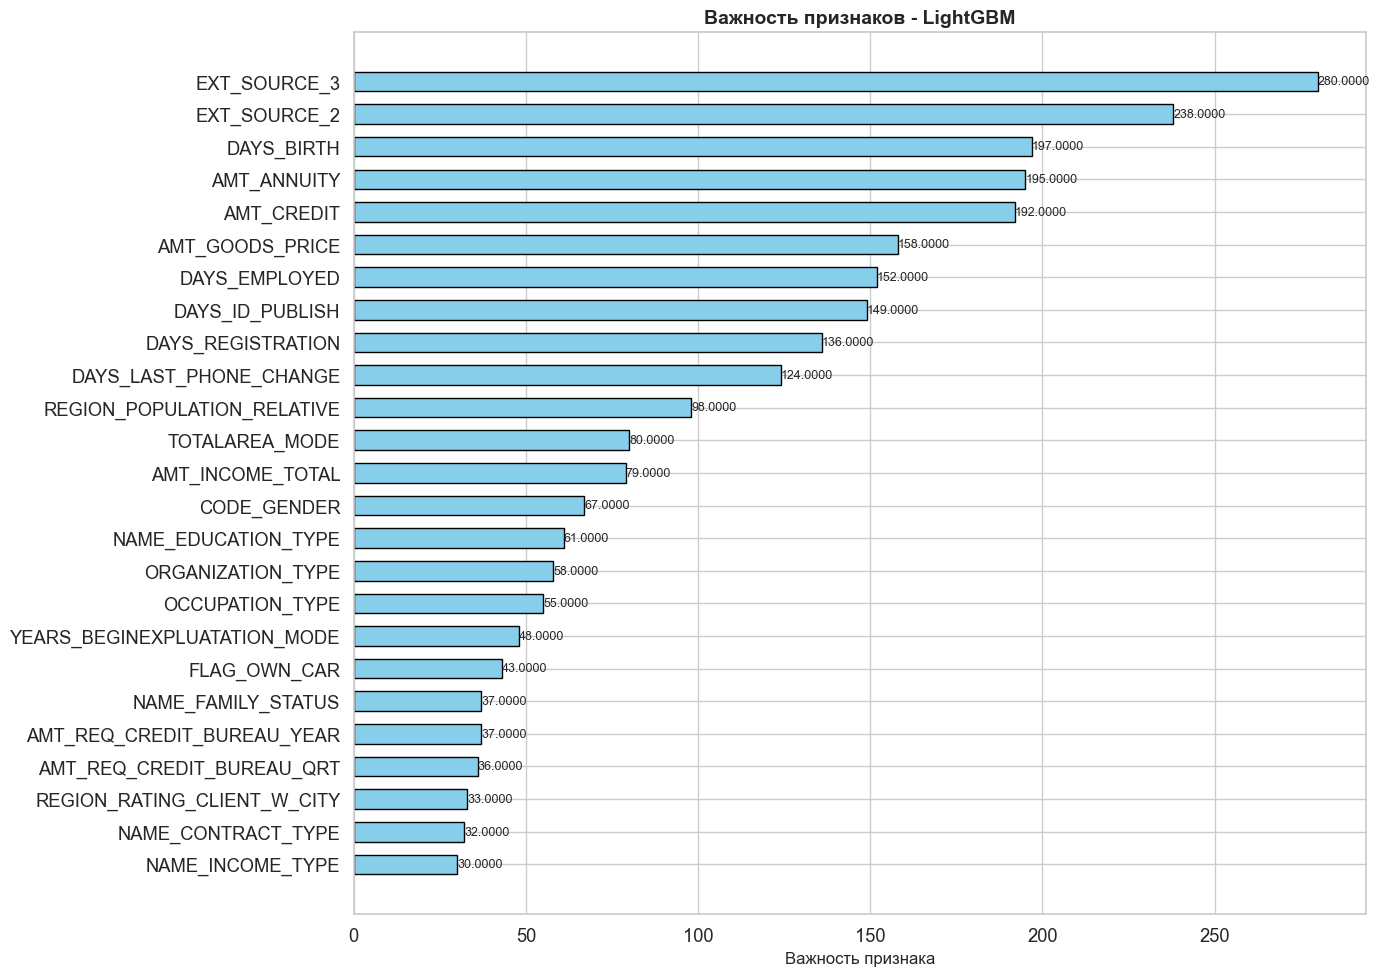


CatBoost - важность признаков:


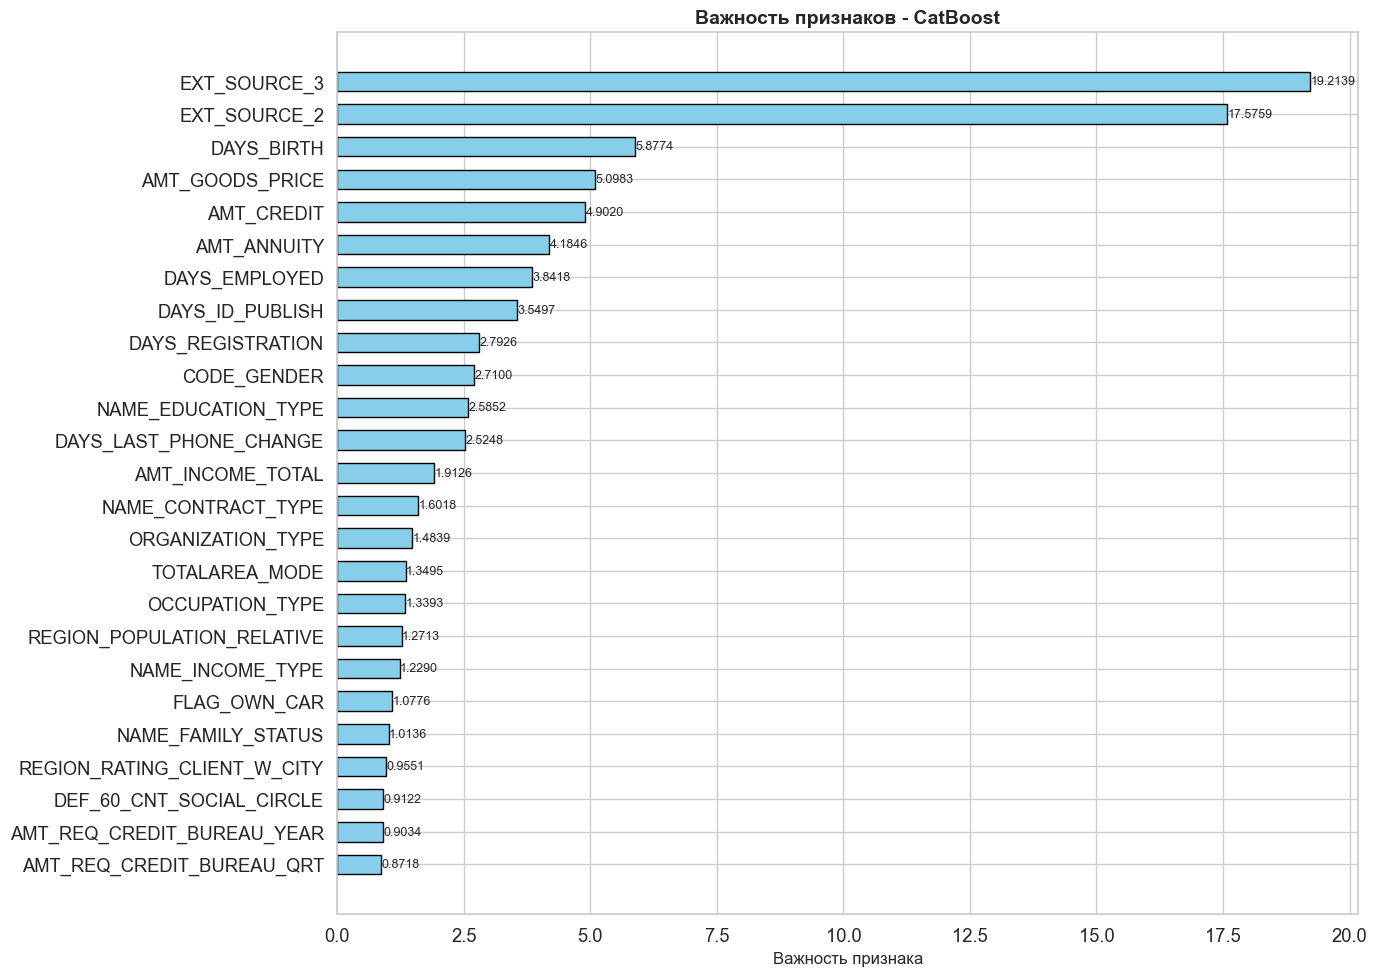


АНАЛИЗ ВАЖНОСТИ ПРИЗНАКОВ И ОПРЕДЕЛЕНИЕ ПОРОГА

LightGBM - анализ важности признаков:
--------------------------------------------------
Средняя важность: 52.631579
Медианная важность: 26.000000
Максимальная важность: 280.000000
Минимальная важность: 0.000000

Предлагаемые пороги для удаления признаков:
  • 1% от максимума: 2.800000
  • Медиана: 26.000000
  • Среднее: 52.631579

Количество признаков ниже порогов:
  • Ниже 1% от максимума: 6 из 57
  • Ниже медианы: 26 из 57
  • Ниже среднего: 40 из 57

Рекомендуемый порог для удаления: 2.800000
Количество признаков для удаления: 6

CatBoost - анализ важности признаков:
--------------------------------------------------
Средняя важность: 1.754386
Медианная важность: 0.592892
Максимальная важность: 19.213930
Минимальная важность: 0.000000

Предлагаемые пороги для удаления признаков:
  • 1% от максимума: 0.192139
  • Медиана: 0.592892
  • Среднее: 1.754386

Количество признаков ниже порогов:
  • Ниже 1% от максимума: 12 из 57
  • Ниже мед

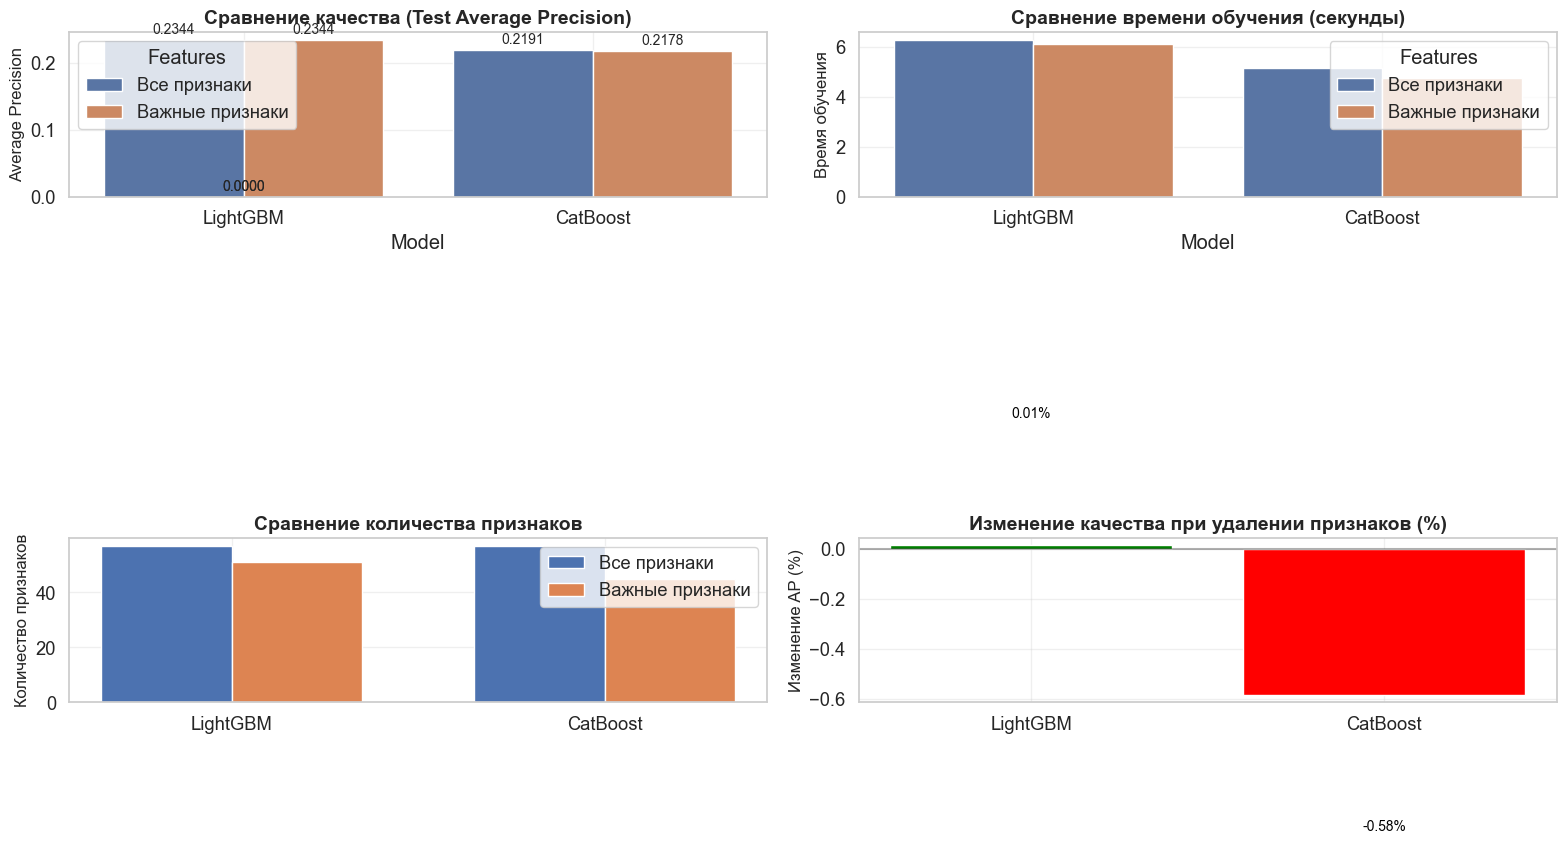


Анализ результатов:

1. LightGBM:
   • Удалено признаков: 6 из 57 (10.5%)
   • Осталось признаков: 51
   • Изменение качества: 0.01%
   • Изменение времени обучения: -2.48%

2. CatBoost:
   • Удалено признаков: 12 из 57 (21.1%)
   • Осталось признаков: 45
   • Изменение качества: -0.58%
   • Изменение времени обучения: -8.18%




In [6]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import average_precision_score
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from catboost import CatBoostClassifier
import joblib
import warnings
warnings.filterwarnings('ignore')

# Настройка стиля графиков
sns.set(style="whitegrid", font_scale=1.2)
plt.rcParams['figure.figsize'] = (14, 10)

# =====================
# Загрузка данных и моделей
X_train, X_test, y_train, y_test = joblib.load('home_credit_prepared_data.pkl')

# Используем только вещественные признаки как в 3.2
numerical_cols = X_train.select_dtypes(exclude=['object', 'category']).columns.tolist()
X_train_num = X_train[numerical_cols].copy()
X_test_num = X_test[numerical_cols].copy()

print(f"Всего вещественных признаков: {len(numerical_cols)}")
print(f"Размер обучающей выборки: {X_train_num.shape}")

# Загрузка моделей из задания 3.2
print("Загрузка моделей из задания 3.2...")
lgb_model = joblib.load('lgb_model_num_features.pkl')
cat_model = joblib.load('cat_model_num_features.pkl')
print("Модели успешно загружены!")

# Визуализация важности признаков
def plot_feature_importances(model, feature_names, model_name, top_n=30):
    """Визуализация важности признаков в виде горизонтального bar-plot"""
    # Получение важностей
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
    elif hasattr(model, 'get_feature_importance'):
        importances = model.get_feature_importance()
        
    # Создание DataFrame
    feature_importance_df = pd.DataFrame({
        'feature': feature_names,
        'importance': importances
    })
    
    # Сортировка по убыванию важности
    feature_importance_df = feature_importance_df.sort_values('importance', ascending=False)
    
    # Выбор топ-N признаков для визуализации
    top_features = feature_importance_df.head(top_n)
    
    # Создание графика
    plt.figure(figsize=(14, max(8, top_n*0.4)))
    bars = plt.barh(top_features['feature'], top_features['importance'], 
                   color='skyblue', edgecolor='black', height=0.6)
    
    plt.xlabel('Важность признака', fontsize=12)
    plt.title(f'Важность признаков - {model_name}', fontsize=14, fontweight='bold')
    plt.gca().invert_yaxis()  # Инвертирование оси Y для отображения самых важных признаков сверху
    
    # Добавление значений на концах столбцов
    for i, bar in enumerate(bars):
        width = bar.get_width()
        plt.text(width + 0.01, bar.get_y() + bar.get_height()/2, 
                f'{width:.4f}', 
                ha='left', va='center', fontsize=9)
    
    plt.tight_layout()
    plt.savefig(f'feature_importance_{model_name.lower()}.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    return feature_importance_df

print("\n" + "="*60)
print("ВИЗУАЛИЗАЦИЯ ВАЖНОСТИ ПРИЗНАКОВ")
print("="*60)

# Важность признаков для LightGBM
print("\nLightGBM - важность признаков:")
lgb_importance = plot_feature_importances(lgb_model, numerical_cols, 'LightGBM', top_n=25)

# Важность признаков для CatBoost
print("\nCatBoost - важность признаков:")
cat_importance = plot_feature_importances(cat_model, numerical_cols, 'CatBoost', top_n=25)

# =====================
# Анализ важности признаков и определение порога

print("\n" + "="*60)
print("АНАЛИЗ ВАЖНОСТИ ПРИЗНАКОВ И ОПРЕДЕЛЕНИЕ ПОРОГА")
print("="*60)

def analyze_feature_importance(importance_df, model_name):
    """Анализ важности признаков и определение порога для удаления"""
    print(f"\n{model_name} - анализ важности признаков:")
    print("-" * 50)
    
    # Статистика важностей
    print(f"Средняя важность: {importance_df['importance'].mean():.6f}")
    print(f"Медианная важность: {importance_df['importance'].median():.6f}")
    print(f"Максимальная важность: {importance_df['importance'].max():.6f}")
    print(f"Минимальная важность: {importance_df['importance'].min():.6f}")
    
    # Определение порога
    # Метод 1: 1% от максимальной важности
    threshold1 = importance_df['importance'].max() * 0.01
    # Метод 2: медиана
    threshold2 = importance_df['importance'].median()
    # Метод 3: среднее значение
    threshold3 = importance_df['importance'].mean()
    
    print(f"\nПредлагаемые пороги для удаления признаков:")
    print(f"  • 1% от максимума: {threshold1:.6f}")
    print(f"  • Медиана: {threshold2:.6f}")
    print(f"  • Среднее: {threshold3:.6f}")
    
    # Подсчет признаков ниже порогов
    print(f"\nКоличество признаков ниже порогов:")
    print(f"  • Ниже 1% от максимума: {sum(importance_df['importance'] < threshold1)} из {len(importance_df)}")
    print(f"  • Ниже медианы: {sum(importance_df['importance'] < threshold2)} из {len(importance_df)}")
    print(f"  • Ниже среднего: {sum(importance_df['importance'] < threshold3)} из {len(importance_df)}")
    
    # Рекомендуемый порог (1% от максимума)
    recommended_threshold = threshold1
    print(f"\nРекомендуемый порог для удаления: {recommended_threshold:.6f}")
    
    # Признаки для удаления
    features_to_remove = importance_df[importance_df['importance'] < recommended_threshold]['feature'].tolist()
    print(f"Количество признаков для удаления: {len(features_to_remove)}")
    
    return recommended_threshold, features_to_remove

# Анализ для LightGBM
lgb_threshold, lgb_features_to_remove = analyze_feature_importance(lgb_importance, 'LightGBM')

# Анализ для CatBoost
cat_threshold, cat_features_to_remove = analyze_feature_importance(cat_importance, 'CatBoost')

# =====================
# Удаление неважных признаков и обучение моделей

print("\n" + "="*60)
print("УДАЛЕНИЕ НЕВАЖНЫХ ПРИЗНАКОВ И ОБУЧЕНИЕ МОДЕЛЕЙ")
print("="*60)

def train_and_evaluate(model_class, params, X_train, X_test, y_train, y_test, feature_names, model_name):
    """Обучение и оценка модели"""
    model = model_class(**params)
    
    start_time = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_time
    
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    test_ap = average_precision_score(y_test, y_pred_proba)
    
    print(f"\n{model_name}:")
    print(f"  • Количество признаков: {X_train.shape[1]}")
    print(f"  • Время обучения: {train_time:.2f} сек")
    print(f"  • Test Average Precision: {test_ap:.4f}")
    
    return model, test_ap, train_time

# Параметры моделей (используем параметры по умолчанию как в 3.2)
lgb_params = {'random_state': 0, 'verbose': -1, 'n_estimators': 100}
cat_params = {'random_state': 0, 'verbose': 0, 'iterations': 100, 'cat_features': []}

results = []

# 1. LightGBM - исходные данные
print("\nLightGBM - исходные данные (все признаки):")
lgb_full, lgb_full_ap, lgb_full_time = train_and_evaluate(
    lgb.LGBMClassifier, lgb_params,
    X_train_num, X_test_num, y_train, y_test,
    numerical_cols, 'LightGBM (все признаки)'
)
results.append(('LightGBM', 'Все признаки', len(numerical_cols), lgb_full_ap, lgb_full_time))

# 2. LightGBM - только важные признаки
important_lgb_features = [f for f in numerical_cols if f not in lgb_features_to_remove]
X_train_lgb_important = X_train_num[important_lgb_features]
X_test_lgb_important = X_test_num[important_lgb_features]

print(f"\nLightGBM - важные признаки (удалено {len(lgb_features_to_remove)} признаков):")
lgb_imp, lgb_imp_ap, lgb_imp_time = train_and_evaluate(
    lgb.LGBMClassifier, lgb_params,
    X_train_lgb_important, X_test_lgb_important, y_train, y_test,
    important_lgb_features, 'LightGBM (важные признаки)'
)
results.append(('LightGBM', 'Важные признаки', len(important_lgb_features), lgb_imp_ap, lgb_imp_time))

# 3. CatBoost - исходные данные
print("\nCatBoost - исходные данные (все признаки):")
cat_full, cat_full_ap, cat_full_time = train_and_evaluate(
    CatBoostClassifier, cat_params,
    X_train_num, X_test_num, y_train, y_test,
    numerical_cols, 'CatBoost (все признаки)'
)
results.append(('CatBoost', 'Все признаки', len(numerical_cols), cat_full_ap, cat_full_time))

# 4. CatBoost - только важные признаки
important_cat_features = [f for f in numerical_cols if f not in cat_features_to_remove]
X_train_cat_important = X_train_num[important_cat_features]
X_test_cat_important = X_test_num[important_cat_features]

print(f"\nCatBoost - важные признаки (удалено {len(cat_features_to_remove)} признаков):")
cat_imp, cat_imp_ap, cat_imp_time = train_and_evaluate(
    CatBoostClassifier, cat_params,
    X_train_cat_important, X_test_cat_important, y_train, y_test,
    important_cat_features, 'CatBoost (важные признаки)'
)
results.append(('CatBoost', 'Важные признаки', len(important_cat_features), cat_imp_ap, cat_imp_time))

# =====================
# Сравнение результатов

print("\n" + "="*60)
print("СРАВНЕНИЕ РЕЗУЛЬТАТОВ")
print("="*60)

results_df = pd.DataFrame(results, columns=['Model', 'Features', 'Feature_Count', 'Test_AP', 'Train_Time'])

print("\nРезультаты:")
print(results_df.round(4))

# Расчет изменений
lgb_ap_change = (lgb_imp_ap - lgb_full_ap) / lgb_full_ap * 100
lgb_time_change = (lgb_imp_time - lgb_full_time) / lgb_full_time * 100

cat_ap_change = (cat_imp_ap - cat_full_ap) / cat_full_ap * 100
cat_time_change = (cat_imp_time - cat_full_time) / cat_full_time * 100

print(f"\nИзменение качества LightGBM: {lgb_ap_change:.2f}%")
print(f"Изменение времени обучения LightGBM: {lgb_time_change:.2f}%")
print(f"\nИзменение качества CatBoost: {cat_ap_change:.2f}%")
print(f"Изменение времени обучения CatBoost: {cat_time_change:.2f}%")

# =====================
# Визуализация сравнения

plt.figure(figsize=(16, 10))

# 1. Сравнение качества
plt.subplot(2, 2, 1)
sns.barplot(data=results_df, x='Model', y='Test_AP', hue='Features')
plt.title('Сравнение качества (Test Average Precision)', fontsize=14, fontweight='bold')
plt.ylabel('Average Precision', fontsize=12)
plt.grid(True, alpha=0.3)

# Добавление значений на столбцах
for i, bar in enumerate(plt.gca().patches):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.005,
             f'{height:.4f}', ha='center', va='bottom', fontsize=10)

# 2. Сравнение времени обучения
plt.subplot(2, 2, 2)
sns.barplot(data=results_df, x='Model', y='Train_Time', hue='Features')
plt.title('Сравнение времени обучения (секунды)', fontsize=14, fontweight='bold')
plt.ylabel('Время обучения', fontsize=12)
plt.grid(True, alpha=0.3)

# 3. Сравнение количества признаков
plt.subplot(2, 2, 3)
feature_counts = pd.DataFrame({
    'Model': ['LightGBM', 'CatBoost'],
    'All_Features': [len(numerical_cols), len(numerical_cols)],
    'Important_Features': [len(important_lgb_features), len(important_cat_features)]
})

x = np.arange(len(feature_counts))
width = 0.35

plt.bar(x - width/2, feature_counts['All_Features'], width, label='Все признаки')
plt.bar(x + width/2, feature_counts['Important_Features'], width, label='Важные признаки')

plt.title('Сравнение количества признаков', fontsize=14, fontweight='bold')
plt.ylabel('Количество признаков', fontsize=12)
plt.xticks(x, feature_counts['Model'])
plt.legend()
plt.grid(True, alpha=0.3)

# 4. Изменение качества при удалении признаков
plt.subplot(2, 2, 4)
ap_changes = [lgb_ap_change, cat_ap_change]
colors = ['green' if change >= 0 else 'red' for change in ap_changes]

plt.bar(['LightGBM', 'CatBoost'], ap_changes, color=colors)
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
plt.title('Изменение качества при удалении признаков (%)', fontsize=14, fontweight='bold')
plt.ylabel('Изменение AP (%)', fontsize=12)
plt.grid(True, alpha=0.3)

# Добавление значений на столбцах
for i, (change, bar) in enumerate(zip(ap_changes, plt.gca().patches)):
    height = bar.get_height()
    color = 'white' if abs(height) > 5 else 'black'
    plt.text(bar.get_x() + bar.get_width()/2., height + (0.5 if height >= 0 else -0.5),
             f'{height:.2f}%', ha='center', va='bottom' if height >= 0 else 'top', 
             fontsize=10, color=color)

plt.tight_layout()
plt.savefig('feature_removal_analysis.png', dpi=300, bbox_inches='tight')
plt.show()



print(f"""
Анализ результатов:

1. LightGBM:
   • Удалено признаков: {len(lgb_features_to_remove)} из {len(numerical_cols)} ({len(lgb_features_to_remove)/len(numerical_cols)*100:.1f}%)
   • Осталось признаков: {len(important_lgb_features)}
   • Изменение качества: {lgb_ap_change:.2f}%
   • Изменение времени обучения: {lgb_time_change:.2f}%

2. CatBoost:
   • Удалено признаков: {len(cat_features_to_remove)} из {len(numerical_cols)} ({len(cat_features_to_remove)/len(numerical_cols)*100:.1f}%)
   • Осталось признаков: {len(important_cat_features)}
   • Изменение качества: {cat_ap_change:.2f}%
   • Изменение времени обучения: {cat_time_change:.2f}%

""")

